# HOUSSENALY Ali - DACHER Maël

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline

<h1 class="text-center">BE de Algorithmes Stochastiques – 21/11/2025</h1>

<br/>

<div class="jumbotron text-center"><b>Le but du BE est de mettre en pratique des méthodes de descente de gradient stochastique dans un cadre d'apprentissage automatique pour des modèles de régression logistique.<br>
Les sections "Pour aller plus loin" sont hors barême et proposent des sujets dont l'étude peut prendre du temps.<br>
 A rendre sur le LMS le 04/12/2025</b></div>

<h1>I. Préliminaires</h1>

<h2>Un exemple simple</h2>

Afin d'illustrer certains concepts d'optimisation stochastique que nous manipulerons dans la suite, nous considérons tout d'abord le problème simple de la minimisation sur $\mathbb{R}$ de la fonction $f$ donnée par

\begin{equation*}
\forall x \in \mathbb{R},\ f(x) = f_0(x) + f_1(x)
\end{equation*}

où $f_0(x) = (x - 1)^2$ et $f_1(x) = (x + 1)^2$. Cette fonction atteint son minimum en $\theta^* = 0$ avec $f(\theta^*) = 2$ et nous disposons des fonctions dérivées définies pour tout $x \in \mathbb{R}$ par

\begin{equation*}
f_0'(x) = 2 (x - 1) \quad \text{et} \quad f_1'(x) = 2 (x + 1).
\end{equation*}

À partir d'un état initial $\theta_0 \in \mathbb{R}$ arbitraire, nous pouvons estimer $\theta^*$ par descente de gradient stochastique où chaque itération consiste à faire un pas dans la direction donnée par $f_I'$ avec $I$ une variable uniforme dans $\{0, 1\}$. Soit $(I_n)_{n \in \mathbb{N}}$ une suite de variables aléatoires indépendantes de même loi que $I$, la récurrence pour définir la suite $(\theta_n)_{n \in \mathbb{N}}$ de la descente de gradient stochastique s'écrit alors

\begin{equation*}
\forall n \in \mathbb{N},\ \theta_{n+1} = \theta_n - \gamma_{n+1} f_{I_n}'(\theta_n)
\end{equation*}

où les pas $(\gamma_n)_{n \geqslant 1}$ sont donnés par

\begin{equation*}
\forall n \geqslant 1,\ \gamma_n = \frac{\gamma}{n^{\alpha}}
\end{equation*}

avec $\alpha, \gamma \geqslant 0$.

<p class="bg-primary" style="padding:1em"><strong>QUESTION I.1.</strong> 

À partir des résultats obtenus en cours pour l'algorithme de Robbins-Monro, donner une condition nécessaire sur $\alpha$ et $\gamma$ pour la convergence presque sûre de $\theta_n$ vers $\theta^*$.

</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.1.</strong> 

### Conditions de convergence presque sûre de Robbins–Monro

Pour que l'algorithme de Robbins–Monro converge presque sûrement vers la solution $\theta^*$, il faut :

1. **Série divergente :** la série des pas diverge
   $$
   \sum_{n=1}^{\infty} \gamma_n = \infty.
   $$
2. **Carrés sommables :** la série des carrés converge
   $$
   \sum_{n=1}^{\infty} \gamma_n^2 < \infty.
   $$

En substituant $\gamma_n = \gamma / n^{\alpha}$ :

- **Somme des pas :** impose $\alpha \leq 1$ et $\gamma$ doit être strictement positif, donc $\gamma > 0$.
- **Somme des carrés :** impose $\alpha > \tfrac{1}{2}$.

Ainsi, les conditions nécessaires pour la convergence presque sûre sont :
$$
\frac{1}{2} < \alpha \leq 1 \quad \text{et} \quad \gamma > 0.
$$


</div>

Bien que la descente de gradient stochastique donne lieu à une suite, il n'est pas nécessaire de conserver les valeurs précédentes pour enchaîner les itérations. Il s'agit là d'un avantage important en pratique du point de vue de la quantité de mémoire nécessaire pour mettre en œuvre cette procédure d'optimisation. Cependant, dans un premier temps, nous stockerons les différentes valeurs prises par la descente de gradient stochastique afin de pouvoir illustrer certaines propriétés.

<p id="qi2" class="bg-primary" style="padding:1em"><strong>QUESTION I.2.</strong> 

Exécuter le code suivant pour visualiser des trajectoires de la descente de gradient stochastique. Le nombre de trajectoires peut être modifié à l'aide de la variable <b>n_rep</b>. Faire varier les valeurs de $\alpha$ et $\gamma$ pour visualiser l'impact de ces paramètres sur la descente de gradient stochastique. En particulier, commenter les résultats obtenus pour $\alpha$ proche de $0$, entre $0$ et $1$ (<i>e.g.</i>, $1/3$, $1/2$ et $2/3$), égal à $1$ et au-delà de $1$.</p>

/tmp/ipykernel_1712/922195578.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[r,0] = np.random.normal(size=1)


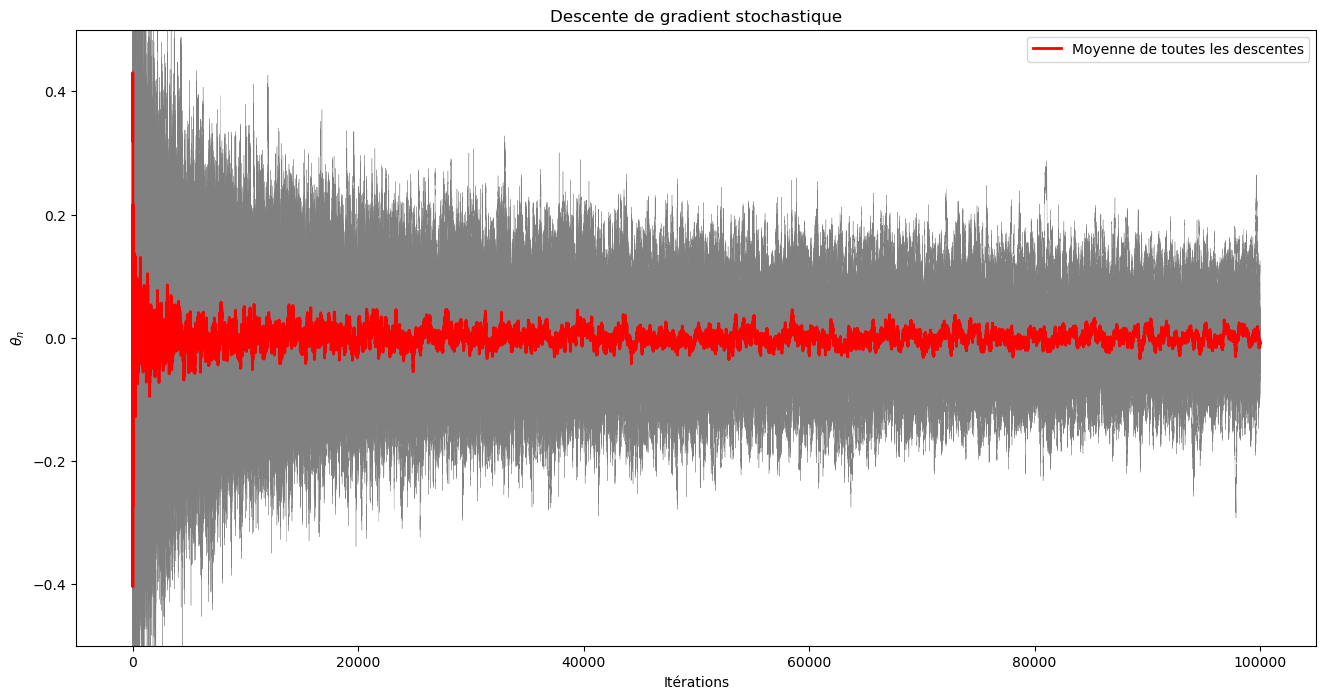

In [2]:
# Nombre de descentes de gradient stochastique
n_rep = 32

# Nombre d'itérations de la descente
n_iter = 100000

# Pas de la descente
def gamma(n):
    alpha = 1/2
    gamma = 1.0
    return gamma / n**alpha

theta = np.zeros((n_rep, n_iter+1))
for r in range(n_rep):
    # Initialisation
    theta[r,0] = np.random.normal(size=1)
    I = np.random.choice(2, size=n_iter)
    for n in range(n_iter):
        # Calcul du gradient
        if I[n] == 0:
            grad = 2.0 * (theta[r,n] - 1.0)
        else:
            grad = 2.0 * (theta[r,n] + 1.0)
        # Mise à jour de la descente de gradient stochastique
        theta[r,n+1] = theta[r,n] - gamma(n+1) * grad

# Affichage
plt.figure(figsize=(16.0, 8.0))
plt.ylim(-0.5, 0.5)
plt.hlines(0.0, 0.0, n_iter, linestyle='--')

for r in range(n_rep):
    plt.plot(theta[r,:], color='grey', linewidth=0.25)

# Amélioration : affichage de la moyenne
plt.plot(np.mean(theta, axis=0), color='red', linewidth=2.0, label='Moyenne de toutes les descentes')
plt.title("Descente de gradient stochastique")
plt.xlabel("Itérations")
plt.ylabel(r"$\theta_n$")
plt.legend()
plt.show()

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.2.</strong> 

- $\alpha$ proche de 0 : on observe une divergence des trajectoires. En effet, le pas de la descente de gradient stochastique ne décroît pas suffisamment vite pour compenser la variance introduite par la nature stochastique de l'algorithme. Les fluctuations dues au bruit persistent, empêchant la convergence vers le minimum.

- $\alpha = 1/2$ : cas limite. On observe une convergence vers le minimum, mais avec des fluctuations significatives autour de la valeur optimale. Le pas décroît suffisamment vite pour permettre la convergence, mais la variance reste importante.

- $\alpha = 2/3$ : on observe une convergence plus stable vers le minimum. Le pas décroît plus rapidement, réduisant les fluctuations et permettant une meilleure approximation de la valeur optimale.
- $\alpha = 1$ : on observe une convergence encore plus stable et rapide vers le minimum. Le pas décroît suffisamment vite pour minimiser les fluctuations, conduisant à une trajectoire lisse qui approche efficacement la valeur optimale.    
- $\alpha > 1$ : on observe une stagnation des trajectoires. Le pas décroît trop rapidement, ce qui empêche l'algorithme de faire des progrès significatifs vers le minimum. Les itérations deviennent inefficaces, et la convergence est compromise.


</div>

Nous avons vu dans le cours que le fait de considérer des moyennes le long des trajectoires d'une descente de gradient stochastique donnait lieu à des résultats intéressants de convergence en espérance. Pour illustrer cette approche dite de Polyak-Ruppert, nous introduisons deux suites $(\bar{\theta}_n)_{n \in \mathbb{N}}$ et $(\tilde{\theta}_n)_{n \in \mathbb{N}}$ définies par $\bar{\theta}_0 = \tilde{\theta}_0 = \theta_0$ et

\begin{equation*}
\forall n \geqslant 1, \quad \bar{\theta}_n = \frac{1}{n} \sum_{k=1}^n \theta_k \quad \text{et} \quad \tilde{\theta}_n = \frac{2}{n(n+1)} \sum_{k=1}^n k \theta_k.
\end{equation*}

<p class="bg-primary" style="padding:1em"><strong>QUESTION I.3.</strong>

Montrer que les suites $(\bar{\theta}_n)_{n \in \mathbb{N}}$ et $(\tilde{\theta}_n)_{n \in \mathbb{N}}$ vérifient les récurrences
\begin{equation*}
\forall n \in \mathbb{N},\ \bar{\theta}_{n+1} = \bar{\theta}_n + \frac{1}{n+1} (\theta_{n+1} - \bar{\theta}_n)
\end{equation*}
et
\begin{equation*}
\forall n \in \mathbb{N},\ \tilde{\theta}_{n+1} = \tilde{\theta}_n + \frac{2}{n+2} (\theta_{n+1} - \tilde{\theta}_n).
\end{equation*}
Quel avantage algorithmique découle de ces récurrences?</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.3.</strong>

On part de la définition :
$$
\bar{\theta}_{n+1} = \frac{1}{n+1} \sum_{k=1}^{n+1} \theta_k.
$$

On sépare le dernier terme :
$$
\bar{\theta}_{n+1} = \frac{1}{n+1} \left( \sum_{k=1}^{n} \theta_k + \theta_{n+1} \right).
$$

Or :
$$
\frac{1}{n+1} \sum_{k=1}^{n} \theta_k = \frac{n}{n+1} \cdot \frac{1}{n} \sum_{k=1}^{n} \theta_k = \frac{n}{n+1} \bar{\theta}_n.
$$

Donc :
$$
\bar{\theta}_{n+1} = \frac{n}{n+1} \bar{\theta}_n + \frac{1}{n+1} \theta_{n+1}
= \bar{\theta}_{n+1} = \frac{n+1-1}{n+1} \bar{\theta}_n + \frac{1}{n+1} \theta_{n+1}
= \bar{\theta}_n + \frac{1}{n+1} \big( \theta_{n+1} - \bar{\theta}_n \big).
$$

---

De même, pour $\tilde{\theta}_n$ :
$$
\tilde{\theta}_{n+1} = \frac{2}{(n+1)(n+2)} \sum_{k=1}^{n+1} k \theta_k.
$$

On sépare le dernier terme :
$$
\tilde{\theta}_{n+1} = \frac{2}{(n+1)(n+2)} \left( \sum_{k=1}^{n} k \theta_k + (n+1)\theta_{n+1} \right).
$$

Or :
$$
\frac{2}{(n+1)(n+2)} \sum_{k=1}^{n} k \theta_k
= \frac{n}{n+2} \cdot \frac{2}{n(n+1)} \sum_{k=1}^{n} k \theta_k
= \frac{n}{n+2} \tilde{\theta}_n.
$$

Donc :
$$
\tilde{\theta}_{n+1} = \frac{n}{n+2} \tilde{\theta}_n + \frac{2}{n+2} \theta_{n+1}
= \tilde{\theta}_{n+1} = \frac{n+2-2}{n+2} \tilde{\theta}_n + \frac{2}{n+2} \theta_{n+1}
= \tilde{\theta}_n + \frac{2}{n+2} \big( \theta_{n+1} - \tilde{\theta}_n \big).
$$

---

### Avantage algorithmique

Ces récurrences montrent qu’il n’est **pas nécessaire de stocker toute la trajectoire** $(\theta_k)_{k \leq n}$ pour calculer les moyennes.  
On peut mettre à jour $\bar{\theta}_n$ et $\tilde{\theta}_n$ **en ligne**, à chaque pas, en utilisant uniquement la valeur précédente et le nouvel échantillon $\theta_{n+1}$.  
Cela réduit fortement la **mémoire nécessaire** et rend l’algorithme plus efficace.




</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION I.4.</strong> 

Exécuter le code suivant pour visualiser des trajectoires de la descente de gradient stochastique ainsi que les moyennes $\bar{\theta}_n$ et $\tilde{\theta}_n$. Commenter les réalisations des deux moyennes. Faire varier $\alpha$ comme dans la <a href="#qi2" style="color:white">question I.2</a> et commenter l'impact de ce paramètre sur les moyennes.</p>

/tmp/ipykernel_1712/1846423870.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[r,0] = np.random.normal(size=1)


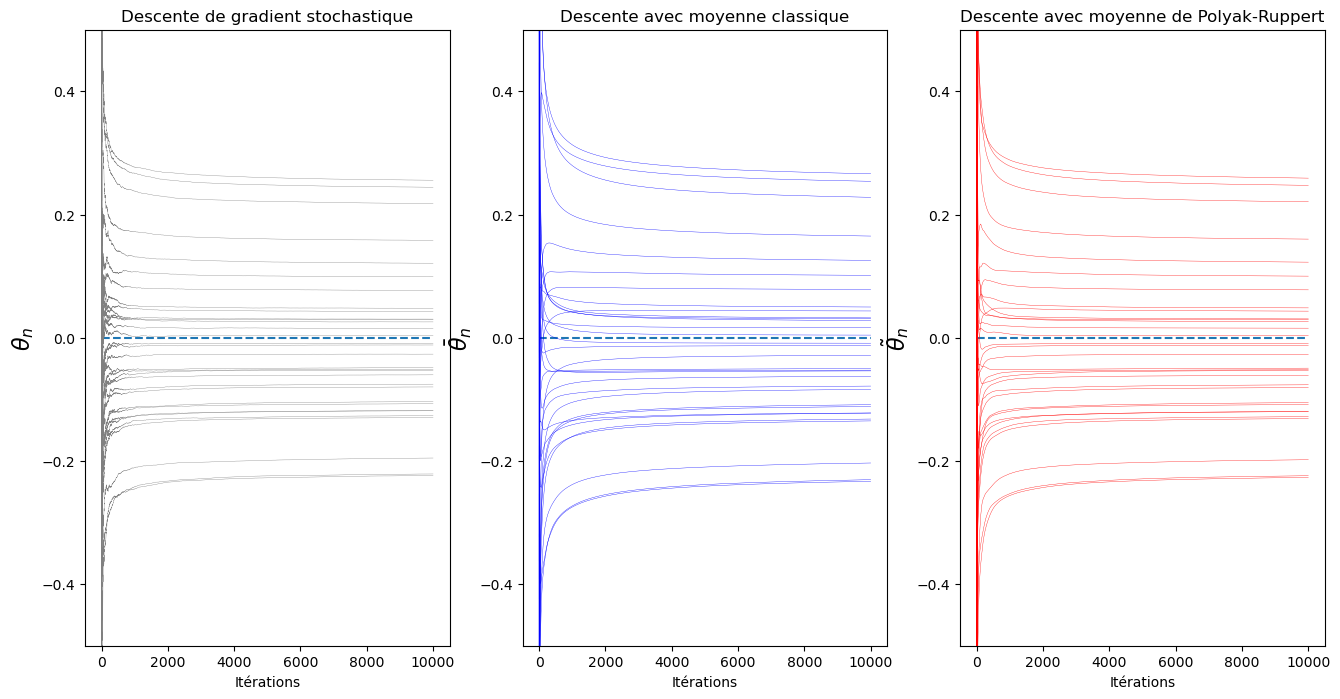

In [3]:
# Nombre de descentes de gradient stochastique
n_rep = 32

# Nombre d'itérations de la descente
n_iter = 10000

# Pas de la descente
def gamma(n):
    alpha = 1.5
    gamma = 1.0
    return gamma / n**alpha

theta = np.zeros((n_rep, n_iter+1))
theta_bar = np.zeros((n_rep, n_iter+1))
theta_tld = np.zeros((n_rep, n_iter+1))
for r in range(n_rep):
    # Initialisation
    theta[r,0] = np.random.normal(size=1)
    theta_bar[r,0] = theta[r,0]
    theta_tld[r,0] = theta[r,0]
    I = np.random.choice(2, size=n_iter)
    for n in range(n_iter):
        # Calcul du gradient
        if I[n] == 0:
            grad = 2.0 * (theta[r,n] - 1.0)
        else:
            grad = 2.0 * (theta[r,n] + 1.0)
        # Mise à jour de la descente de gradient stochastique et des moyennes
        theta[r,n+1] = theta[r,n] - gamma(n+1) * grad
        theta_bar[r,n+1] = theta_bar[r,n] + (theta[r,n+1] - theta_bar[r,n]) / (n + 1)
        theta_tld[r,n+1] = theta_tld[r,n] + 2.0 * (theta[r,n+1] - theta_tld[r,n]) / (n + 2)

# Affichage
_, ax = plt.subplots(1, 3, figsize=(16.0, 8.0))
for i in range(3):
    ax[i].set_ylim(-0.5, 0.5)
    ax[i].hlines(0.0, 0.0, n, linestyle='--')
for r in range(n_rep):
    ax[0].plot(theta[r,:], color='grey', linewidth=0.25)
    ax[1].plot(theta_bar[r,:], color='blue', linewidth=0.25)
    ax[2].plot(theta_tld[r,:], color='red', linewidth=0.25)

    
# Amélioration : affichage légende
ax[0].set_title("Descente de gradient stochastique")
ax[0].set_xlabel("Itérations")
ax[0].set_ylabel(r"$\theta_n$", size=16)
ax[1].set_title("Descente avec moyenne classique")
ax[1].set_xlabel("Itérations")
ax[1].set_ylabel(r"$\bar{\theta}_n$", size=16)
ax[2].set_title("Descente avec moyenne de Polyak-Ruppert")
ax[2].set_xlabel("Itérations")
ax[2].set_ylabel(r"$\tilde{\theta}_n$", size=16)
plt.show()

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.4.</strong> 

- $\alpha$ proche de 0 : On observe des divergences et oscillations bien plus faible pour les moyennes $\bar{\theta}_n$ et $\tilde{\theta}_n$ comparées à la trajectoire brute $\theta_n$. En effet, les moyennes atténuent les fluctuations dues au bruit stochastique, offrant une estimation plus stable du minimum.

- $\alpha = 1/2$ : cas limite. Les moyennes montrent une convergence vers le minimum avec des fluctuations réduites par rapport à la trajectoire brute. Cependant, des variations subsistent, indiquant que le pas n'est pas encore optimal pour minimiser la variance.

- $\alpha = 2/3$ : Les moyennes convergent de manière plus stable et rapide vers le minimum. Le pas décroît suffisamment vite pour réduire les fluctuations.

- $\alpha = 1$ : Les moyennes convergent rapidement et de manière très stable vers le minimum. Le pas décroît suffisamment vite pour minimiser les fluctuations, conduisant à des trajectoires lisses qui approchent efficacement la valeur optimale.

- $\alpha > 1$ : Les moyennes stagnent, reflétant la stagnation observée dans la trajectoire brute. Le pas décroît trop rapidement, empêchant des progrès significatifs vers le minimum, et les moyennes ne parviennent pas à améliorer l'estimation.


</div>

<h2>Données MNIST</h2>

Les données que nous manipulerons dans la suite du BE sont issues du célèbre [jeu de données MNIST](http://yann.lecun.com/exdb/mnist/) mis à disposition par Yann LeCun, Corinna Cortes et Christopher J.C. Burges. Chacune de ces données est une image d'un chiffre écrit à la main et son label dans $\{0, \dots, 9\}$ correspond à la valeur du chiffre représenté. Les images sont des carrés de $28 \times 28$ pixels pouvant prendre $256$ niveaux de gris. La base de données se décompose en un jeu d'entraînement de $60000$ images utilisées pour construire les prédicteurs et un jeu de test de $10000$ images utilisées pour en mesurer la qualité.

<p class="bg-primary" style="padding:1em"><strong>QUESTION I.5.</strong> Exécuter le code suivant pour charger les données MNIST. Les entiers sont stockés dans ces fichiers selon le format <i>big endian</i>, expliquer ce que cela signifie et comment le type passé en paramètre à la fonction <b>np.frombuffer</b> permet de gérer ce format.</p>

In [4]:
def charge_images(fic):
    """
    Charge les images d'un jeu de données au format MNIST.
    """
    with gzip.open(fic, 'rb') as f:
        # Lecture de l'en-tête
        buf = f.read(16)
        magic, n_items, n_rows, n_cols = np.frombuffer(buf, dtype=np.dtype('>I'))
        # Extraction des images
        image_size = n_rows * n_cols
        images = np.empty(n_items, dtype=np.ndarray)
        for i in range(n_items):
            buf = f.read(image_size)
            images[i] = np.frombuffer(buf, dtype=np.dtype('B')).reshape(n_rows, n_cols)
    return images

def charge_labels(fic):
    """
    Charge les labels d'un jeu de données au format MNIST.
    """
    with gzip.open(fic, 'rb') as f:
        # Lecture de l'en-tête
        buf = f.read(8)
        magic, n_items = np.frombuffer(buf, dtype=np.dtype('>I'))
        # Extraction des labels
        buf = f.read(n_items)
        labels = np.frombuffer(buf, dtype=np.dtype('B'))
    return labels

images = charge_images('train-images-idx3-ubyte.gz')
labels = charge_labels('train-labels-idx1-ubyte.gz')

images_test = charge_images('t10k-images-idx3-ubyte.gz')
labels_test = charge_labels('t10k-labels-idx1-ubyte.gz')

image_taille = images[0].shape[0] * images[0].shape[1]
print('Entraînement ... {} images de taille {} ({} pixels)'.format(
    len(labels),
    'x'.join(map(str, images[0].shape)),
    image_taille)
)
print('Test ........... {} images de taille {} ({} pixels)'.format(
    len(labels_test),
    'x'.join(map(str, images_test[0].shape)),
    image_taille)
)

Entraînement ... 60000 images de taille 28x28 (784 pixels)
Test ........... 10000 images de taille 28x28 (784 pixels)


<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.5.</strong> 

Le format **big endian** signifie que les octets d'un entier sont stockés en mémoire
du plus significatif au moins significatif.  
Autrement dit, l'octet de poids fort (high-order byte) est placé en premier,
suivi des octets de poids plus faibles.

Par exemple, l'entier 305419896 (en hexadécimal 0x12345678) est représenté en big endian par :
$$
12 \; 34 \; 56 \; 78
$$
alors qu'en little endian il serait stocké comme :
$$
78 \; 56 \; 34 \; 12.
$$

Dans le code, la fonction `np.frombuffer` lit directement une séquence d'octets
et les interprète selon un type précisé par le paramètre `dtype`.

- L'argument `dtype=np.dtype('>I')` indique :
  - `I` : entier non signé (unsigned int).
  - `>` : ordre des octets big endian.

Ainsi, `np.frombuffer(buf, dtype=np.dtype('>I'))` lit correctement les entiers
stockés dans les fichiers MNIST, qui sont écrits en big endian.

Pour les labels et les pixels, on utilise `dtype=np.dtype('B')` :
- `B` : entier non signé sur 1 octet (valeurs de 0 à 255).
- Ici, pas besoin de préciser l’ordre des octets car chaque valeur tient sur un seul octet.


</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION I.6.</strong> Exécuter le code suivant pour visualiser quelques exemples de données MNIST. Commenter la diversité des images pour un label donné.</p>

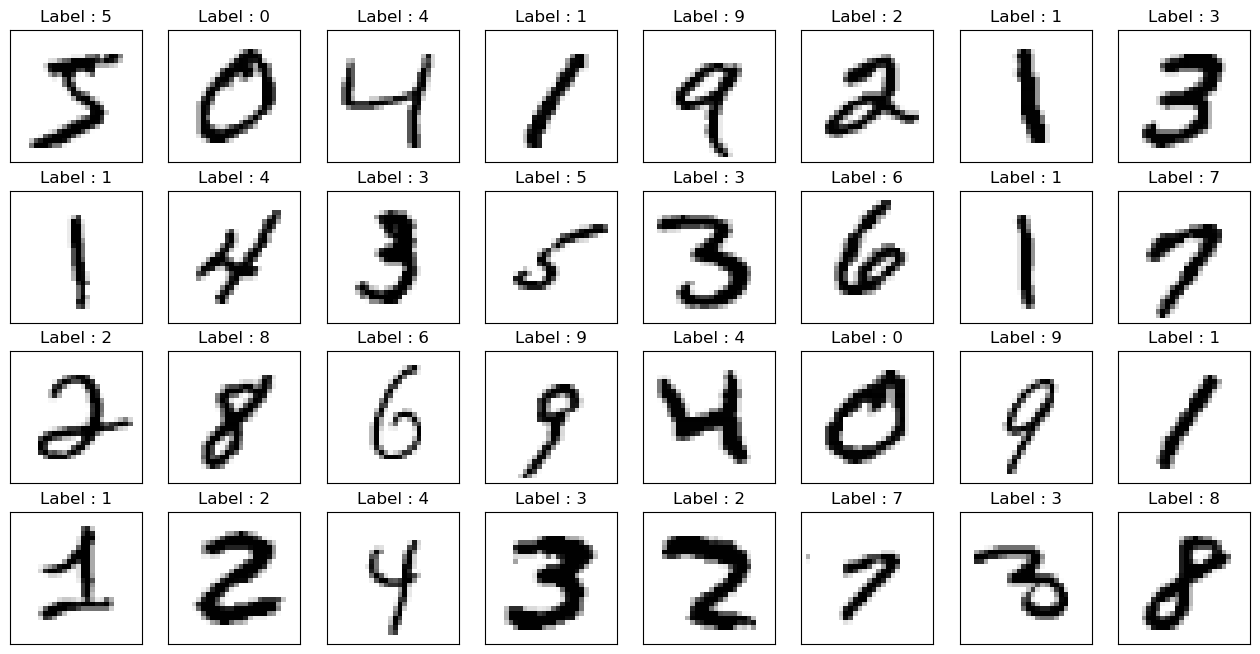

In [5]:
_, ax = plt.subplots(4, 8, figsize=(16.0, 8.0))
for i in range(4):
    for j in range(8):
        k = 8*i + j
        ax[i][j].set_title('Label : {}'.format(labels[k]))
        ax[i][j].xaxis.set_major_locator(plt.NullLocator())
        ax[i][j].yaxis.set_major_locator(plt.NullLocator())
        ax[i][j].imshow(images[k], cmap='gray_r')

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.6.</strong> 

La diversité des images pour un label donné dans le jeu de données MNIST est bonne. 
On observe que pour chaque chiffre (0 à 9), il existe une bonne variété de styles d'écriture, tailles, orientations et épaisseurs de traits.

</div>

<h1>II. Régression logistique</h1>

Le problème d'apprentissage automatique auquel nous nous intéressons dans ce BE est celui de la **classification supervisée** des données MNIST, *i.e.* la prédiction du label associé à une image de chiffre manuscrit. Chaque image contient $784$ pixels que nous pouvons normaliser comme des éléments de $[0,1]$ en divisant par $255$ qui est la valeur maximale (un pixel blanc vaut $0$ et un pixel noir vaut $1$). Ainsi, une image se manipule comme un vecteur de $[0,1]^{784}$ et un **prédicteur** est une fonction construite à partir des données qui va de $[0,1]^{784}$ dans l'ensemble des labels $\{0, \dots, 9\}$. Nous reviendrons sur ce problème général dans la dernière partie du BE et nous considérons d'abord le sous-problème de la prédiction des $0$ et des $1$ uniquement.

La **régression logistique** est un modèle statistique utilisé pour expliquer une variable binaire $Y \in \{0, 1\}$ à partir d'un vecteur $X \in \mathbb{R}^d$ de variables quantitatives. Dans notre cas, $Y$ représente le label à prédire et $X$ l'image à laquelle nous ajoutons une composante constante égale à $1.0$ afin de pouvoir considérer une ordonnée à l'origine sans complexifier les notations dans la suite, *i.e.* nous travaillerons dans $\mathbb{R}^d$ avec $d=785$. Soit $x \in \mathbb{R}^d$, l'étape de modélisation consiste à considérer que $Y$ sachant $X = x$ suit une loi de Bernoulli de paramètre $p(x' \beta)$ où les coefficients de régression $\beta \in \mathbb{R}^d$ sont les paramètres du modèle et où $p$ désigne la **fonction logistique**,

\begin{equation*}
\forall t \in \mathbb{R},\ p(t) = \frac{e^t}{1 + e^t} \in [0,1].
\end{equation*}

Étant données des observations $(x_1, y_1), \dots, (x_N, y_N) \in \mathbb{R}^d \times \{0,1\}$, l'approche usuelle pour estimer $\beta$ consiste à maximiser la vraisemblance

\begin{equation*}
\forall \beta \in \mathbb{R}^d,\ L_N(\beta) = \prod_{k=1}^N \mathbb{P}(Y = y_k \mid X = x_k) = \prod_{k=1}^N p(x_k' \beta)^{y_k} (1 - p(x_k' \beta))^{1 - y_k}.
\end{equation*}

De façon équivalente, nous chercherons à minimiser l'opposé du logarithme normalisé de cette vraisemblance donné par la fonction $f$ suivante,

\begin{equation*}
\forall \beta \in \mathbb{R}^d,\ f(\beta) = - \frac{1}{N} \ln\left( L_N(\beta) \right).
\end{equation*}

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.1.</strong> 

Montrer que
\begin{equation*}
\forall \beta \in \mathbb{R}^d,\ f(\beta) = \frac{1}{N} \sum_{k=1}^N \ln\left( 1 + \exp\left( (1 - 2 y_k) x_k' \beta \right) \right)
\end{equation*}
et que le gradient est donné par
\begin{equation*}
\forall \beta \in \mathbb{R}^d,\ \nabla f(\beta) = \frac{1}{N} \sum_{k=1}^N p\left( (1 - 2 y_k) x_k' \beta \right) \times (1 - 2 y_k) x_k.
\end{equation*}
Prouver également que la fonction $f$ est convexe sur $\mathbb{R}$ en utilisant le fait qu'elle est donnée par une somme de fonctions composées d'une fonction convexe et d'une application affine.</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.1.</strong> 

### Formulation de $f(\beta)$

On part de la définition de la fonction de coût :
$$
f(\beta) = - \frac{1}{N} \sum_{k=1}^N \Big[ \ln \left( p(x_k' \beta)^{y_k} (1 - p(x_k' \beta))^{1 - y_k} \right) \Big]
= - \frac{1}{N} \sum_{k=1}^N \Big[ y_k \ln(p(x_k' \beta)) + (1 - y_k) \ln (1 - p(x_k' \beta)) \Big].
$$

On a également :
$$
p(t) = \frac{e^t}{1 + e^t}, \quad 1 - p(t) = \frac{1}{1 + e^t}.
$$

Soit $t = x_k' \beta$ pour alléger les notations.

- **Si $y_k = 1$**, la contribution du $k$-ième terme dans $f(\beta)$ est :
  $$
  - \ln(p(t)) = - \ln\left( \frac{e^t}{1 + e^t} \right)
  = - \big( \ln e^t - \ln(1 + e^t) \big)
  = - t + \ln(1 + e^t).
  $$
  En factorisant $e^t$ dans le logarithme :
  $$
  - \ln(p(t)) = \ln\left( \frac{1 + e^t}{e^t} \right)
  = \ln\left( 1 + e^{-t} \right).
  $$
  Donc, pour $y_k = 1$,
  $$
  \text{terme}_k = \ln(1 + e^{-x_k' \beta}).
  $$

- **Si $y_k = 0$**, la contribution du $k$-ième terme dans $f(\beta)$ est :
  $$
  - \ln(1 - p(t)) = - \ln\left( \frac{1}{1 + e^t} \right)
  = \ln(1 + e^t).
  $$
  Donc, pour $y_k = 0$,
  $$
  \text{terme}_k = \ln(1 + e^{x_k' \beta}).
  $$



On peut regrouper les deux cas en écrivant :
$$
f(\beta) = \frac{1}{N} \sum_{k=1}^N \ln \Big( 1 + \exp\big( (1 - 2 y_k) x_k' \beta \big) \Big).
$$


---

### Calcul du gradient

On dérive terme par terme :
$$
\nabla f(\beta) = \frac{1}{N} \sum_{k=1}^N 
\frac{\exp\big( (1 - 2 y_k) x_k' \beta \big)}{1 + \exp\big( (1 - 2 y_k) x_k' \beta \big)} \cdot (1 - 2 y_k) x_k.
$$

Or
$$
\frac{e^t}{1 + e^t} = p(t).
$$

Donc :
$$
\nabla f(\beta) = \frac{1}{N} \sum_{k=1}^N p\big( (1 - 2 y_k) x_k' \beta \big) \cdot (1 - 2 y_k) x_k.
$$

---

### Convexité

Chaque terme de la somme est de la forme :
$$
g(u) = \ln(1 + e^u), \quad u = (1 - 2 y_k) x_k' \beta.
$$

- La fonction $g(u)$ est convexe car sa dérivée seconde est positive :
$$
g''(u) = \frac{e^u}{(1 + e^u)^2} > 0.
$$
- L’argument $u$ est une application affine de $\beta$.

Ainsi, chaque terme est la composition d’une fonction convexe avec une application affine, donc convexe.  
La somme de fonctions convexes est convexe, donc $f(\beta)$ est convexe sur $\mathbb{R}^d$.





</div>



Nous notons $q$ la fonction définie sur $\mathbb{R}$ qui apparaît dans l'expression de $f$ ci-dessus,

\begin{equation*}
\forall t \in \mathbb{R},\ q(t) = \ln\left( 1 + e^t \right) \in \mathbb{R}_+^*.
\end{equation*}

Les fonctions $p$ et $q$ font intervenir des exponentielles qui peuvent poser des problèmes lorsqu'elles sont évaluées avec des arguments trop grands car cela conduit à des valeurs infinies erronées. Pour pallier à ce problème, il convient de remarquer que

\begin{equation*}
\forall t \in \mathbb{R}, \quad p(t) = \frac{e^t}{1 + e^t} = \frac{1}{1 + e^{-t}} \quad \text{et} \quad q(t) = \ln\left( 1 + e^t \right) = t + \ln\left( 1 + e^{-t} \right).
\end{equation*}

Ainsi, il est toujours possible d'évaluer les exponentielles avec des arguments négatifs de façon à éviter l'apparition de valeurs infinies.

<p id="qii2" class="bg-primary" style="padding:1em"><strong>QUESTION II.2.</strong> Exécuter le code suivant pour charger la défintion des fonctions $p$, $q$ et $f$. Comprendre ce que fait la fonction <b>np.vectorize</b> et expliquer pourquoi cela est utile dans notre cas.</p>

In [6]:
# Fonction logistique
p = np.vectorize(lambda t: 1 / (1 + np.exp(-t)) if t > 0 else np.exp(t) / (1 + np.exp(t)))

# Fonction log-logistique
q = np.vectorize(lambda t: t + np.log(1 + np.exp(-t)) if t > 0 else np.log(1 + np.exp(t)))

# Fonction f à minimiser
def f(x, y, beta):
    """
    Retourne l'évaluation de la fonction f pour tous les vecteurs donnés par les colonnes de la matrice beta.
      x : matrice de taille (N, d) où les lignes sont données par les images
      y : vecteur de taille N des labels associés aux images
    """
    return q(np.diag(1 - 2*y).dot(x.dot(beta))).mean(axis=0)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.2.</strong> 

La fonction `np.vectorize` transforme une fonction scalaire (qui prend une seule valeur $t$ en entrée)
en une fonction capable de s’appliquer **élément par élément** sur des tableaux NumPy.

Ainsi, au lieu d’écrire des boucles explicites pour traiter chaque valeur de $t$,
on peut appliquer directement $p$ ou $q$ à un vecteur ou une matrice :
$$
p(\mathbf{t}) = \big( p(t_1), p(t_2), \dots, p(t_m) \big).
$$

Cela est utile ici car les données MNIST sont représentées par des vecteurs de grande dimension ($d = 785$). Il est donc plus efficace et pratique de pouvoir appliquer $p$ et $q$ directement sur des tableaux NumPy.



</div>

Pour pouvoir utiliser une descente de gradient déterministe et afficher des courbes données par un grand nombre d'évaluations de $f$ tout en conservant des temps de calcul raisonnables, nous limitons tout d'abord notre étude aux $1000$ premières images de $0$ et de $1$ du jeu d'entraînement. Cette limite sera supprimée dans un second temps lorsque nous ne conserverons plus la suite des valeurs prises par les différents algorithmes considérés et que nous ne procéderons plus à des affichages à visée pédagogique.

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.3.</strong> Exécuter le code suivant pour extraire et mettre en forme les données MNIST représentant des $0$ et des $1$. Ajuster la valeur de <b>N</b> en fonction des capacités de calcul disponibles.</p>

In [7]:
N = 1000 # Nombre d'images d'entraînement conservées
d = 785  # Dimension des données

# Filtre les images d'entraînement de 0 et de 1
filtre_0_1 = np.bitwise_or(labels == 0, labels == 1)
print('Il y a {} images d\'entraînement de 0 et de 1.'.format(filtre_0_1.sum()))

# Extraction des données d'entraînement
x = np.zeros((N, d))
for i in range(N):
    x[i,0] = 1.0
    x[i,1:] = images[filtre_0_1][i].reshape(image_taille) / 255
y = labels[filtre_0_1][:N].astype(np.int8)
print('{} images d\'entraînement sont conservées.'.format(len(y)))

# Filtre les images de test de 0 et de 1
filtre_0_1_test = np.bitwise_or(labels_test == 0, labels_test == 1)
N_test = filtre_0_1_test.sum()
print('Il y a {} images de test de 0 et de 1.'.format(N_test))

# Extraction des données de test
x_test = np.zeros((N_test, d))
for i in range(N_test):
    x_test[i,0] = 1.0
    x_test[i,1:] = images_test[filtre_0_1_test][i].reshape(image_taille) / 255
y_test = labels_test[filtre_0_1_test].astype(np.int8)

Il y a 12665 images d'entraînement de 0 et de 1.
1000 images d'entraînement sont conservées.
Il y a 2115 images de test de 0 et de 1.


<h2>Descente de gradient (DG)</h2>

Avec peu de données, l'utilisation d'une descente de gradient déterministe est envisageable pour minimiser $f$  car les calculs ne prennent pas trop de temps. Pour rappel, cette méthode consiste à définir une suite $(\beta_{DG}^{(n)})_{n \in \mathbb{N}}$ par la récurrence

\begin{equation*}
\forall n \in \mathbb{N},\ \beta_{DG}^{(n+1)} = \beta_{DG}^{(n)} - \gamma \nabla f(\beta_{DG}^{(n)})
\end{equation*}

où le pas $\gamma > 0$ est constant et $\beta_{DG}^{(0)} \in \mathbb{R}^d$ est un état initial arbitraire. Nous ne discuterons pas ici de la convergence de cet algorithme mais le pas $\gamma$ doit être suffisamment petit par rapport à l'inverse de la norme de Lipschitz du gradient de $f$ pour avoir de bonnes propriétés en pratique.

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.4.</strong> Exécuter le code suivant pour calculer la descente de gradient. Ajuster la valeur <b>n_iter</b> si le calcul prend trop de temps. À l'aide du graphique en échelle logarithmique, discuter de la vitesse de convergence de cet algorithme.</p>

Valeur finale de la fonction : 0.03356136584083352


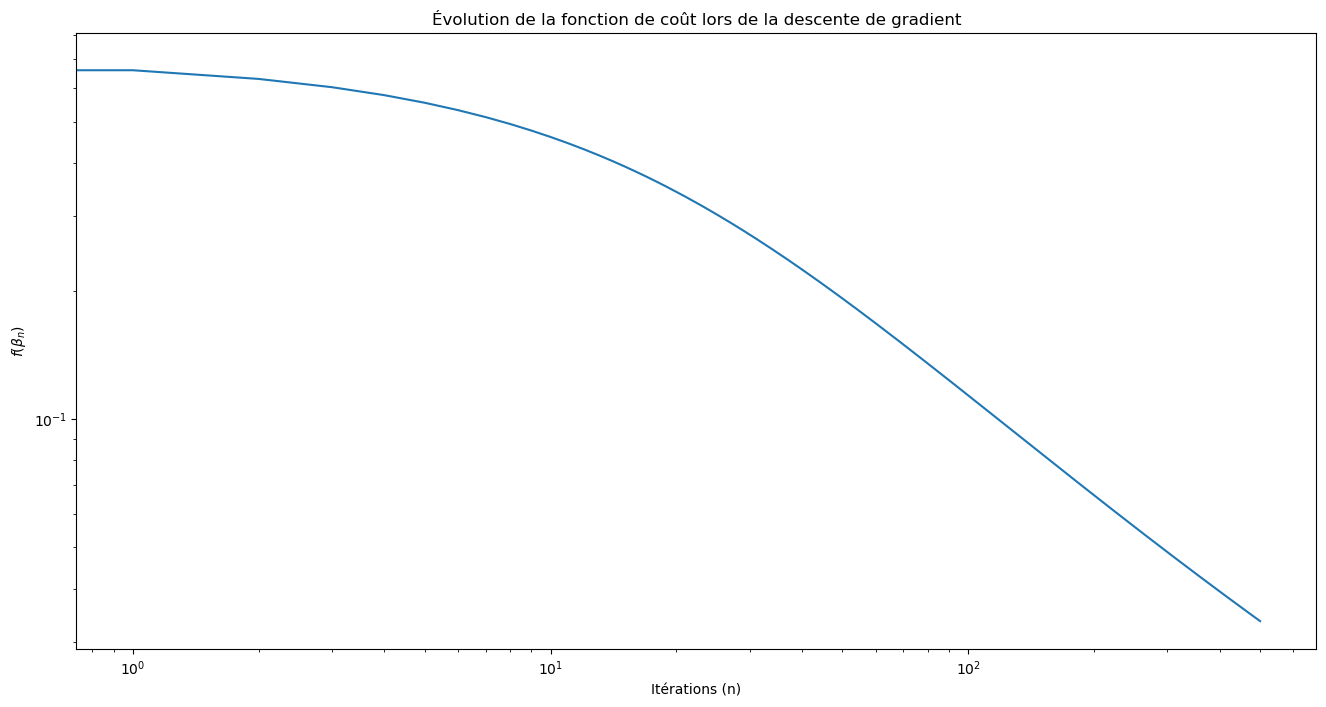

In [8]:
### CE CODE PREND DU TEMPS POUR S'EXÉCUTER ###

# Nombre d'itérations de la descente
n_iter = 500 # 500 initialement

# Pas de la descente
gamma = 1e-2

# Initialisation
beta_dg = np.zeros((d, n_iter+1))

for n in range(n_iter):
    # Calcul du gradient
    grad = np.diag(p((1 - 2*y) * x.dot(beta_dg[:,n])) * (1 - 2*y)).dot(x).mean(axis=0)
    # Mise à jour de la descente de gradient
    beta_dg[:,n+1] = beta_dg[:,n] - gamma * grad

# Calcul des valeurs de f
f_dg = f(x, y, beta_dg)
print('Valeur finale de la fonction : {}'.format(f_dg[-1]))

# Affichage
plt.figure(figsize=(16.0, 8.0))
plt.xlabel('n')
plt.xscale('log')
plt.yscale('log')
_ = plt.plot(f_dg)

# Amélioration : affichage légende
plt.title("Évolution de la fonction de coût lors de la descente de gradient")
plt.xlabel("Itérations (n)")
plt.ylabel(r"$f(\beta_n)$")
plt.show()

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.4.</strong> 

On observe une bonne vitesse de convergence de la descente de gradient déterministe, elle semble quasi-exponentielle.
La courbe en échelle logarithmique montre une diminution rapide de la fonction de coût $f(\beta_{DG}^{(n)})$ au fil des itérations.  
Cela indique que l'algorithme approche efficacement le minimum de la fonction.  

</div>

<p id="qii5" class="bg-primary" style="padding:1em"><strong>QUESTION II.5.</strong> Exécuter le code suivant pour mesurer de la qualité du prédicteur obtenu sur les données de test. Expliquer ce que contient la <b>matrice de confusion</b> et commenter ces résultats.</p>

In [9]:
beta = beta_dg[:,-1]

mal_classe = np.abs(y_test - p(x_test.dot(beta))) > 0.5
print('Taux d\'erreur : {:.2%} [ {} image(s) mal classées ]'.format(mal_classe.mean(), mal_classe.sum()))

pred = p(x_test.dot(beta))
pred0 = pred[y_test == 0]
pred1 = pred[y_test == 1]
confusion = np.array([
    [(pred0 < 0.5).mean(), (pred0 >= 0.5).mean()],
    [(pred1 < 0.5).mean(), (pred1 >= 0.5).mean()]
])
print('Matrice de confusion :\n{}'.format(confusion))

Taux d'erreur : 0.14% [ 3 image(s) mal classées ]
Matrice de confusion :
[[0.99693878 0.00306122]
 [0.         1.        ]]


<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.5.</strong> 

La matrice de confusion permet d'observer les predictions réalisées par le modèle. Elle présente les vrais positifs et vrai négatifs mais également les faux positifs et faux négatifs.

On voit que le modèle a une très bonne performance, sur 2115 images de test, seulement 3 images ont été mal classé.


</div>

<h2>Descente de gradient stochastique (DGS)</h2>

Pour utiliser un algorithme de descente de gradient stochastique, il faut écrire la fonction $f$ à minimiser comme l'espérance d'une fonction aléatoire convexe. Dans notre cas, cette écriture est simplement donnée par

\begin{equation*}
\forall \beta \in \mathbb{R}^d,\ f(\beta) = \mathbb{E}\left[ F_K(\beta) \right]
\end{equation*}

où $K$ suit la loi uniforme sur $\{1, \dots, N\}$ et les fonctions $F_1, \dots, F_N$ sont définies par

\begin{equation*}
\forall k \in \{1, \dots, N\},\ F_k(\beta) = \ln\left( 1 + \exp\left( (1 - 2 y_k) x_k' \beta \right) \right).
\end{equation*}

En considérant un état initial $\beta_{DGS}^{(0)} \in \mathbb{R}^d$ et une suite $(K_n)_{n \in \mathbb{N}}$ de variables indépendantes de même loi que $K$, nous introduisons la suite $(\beta_{DGS}^{(n)})_{n \in \mathbb{N}}$ définie par récurrence,

\begin{align*}
\forall n \in \mathbb{N},\ \beta_{DGS}^{(n+1)} & = \beta_{DGS}^{(n)} - \gamma_{n+1} \nabla F_{K_n}(\beta_{DGS}^{(n)})\\
& = \beta_{DGS}^{(n)} - \gamma_{n+1} p\left( (1 - 2 y_{K_n}) x_{K_n}' \beta_{DGS}^{(n)} \right) (1 - 2 y_{K_n}) x_{K_n}
\end{align*}

où les pas $(\gamma_n)_{n \geqslant 1}$ sont donnés par

\begin{equation*}
\forall n \geqslant 1,\ \gamma_n = \frac{\gamma}{(n/N)^{\alpha}}
\end{equation*}

avec $\alpha \in [0,1]$ et $\gamma > 0$. Comme dans la partie préliminaire, nous considérons aussi l'approche de Polyak-Ruppert avec les suites $(\bar{\beta}_n)_{n \in \mathbb{N}}$ et $(\tilde{\beta}_n)_{n \in \mathbb{N}}$ définies par $\bar{\beta}_0 = \tilde{\beta}_0 = \beta_{DGC}^{(0)}$ et par les moyennes

\begin{equation*}
\forall n \geqslant 1, \quad \bar{\beta}_n = \frac{1}{n} \sum_{k=1}^n \beta_{DGC}^{(k)} \quad \text{et} \quad \tilde{\beta}_n = \frac{2}{n(n+1)} \sum_{k=1}^n k \beta_{DGC}^{(k)}.
\end{equation*}

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.6.</strong> Exécuter le code suivant pour simuler une trajectoire de la descente de gradient stochastique ainsi que les moyennes associées. Ajuster si besoin le pas <b>n_step</b> des évaluations de $f$ si le calcul prend trop de temps. Faire varier les valeurs de $\alpha$ et $\gamma$ pour visualiser l'impact de ces paramètres, comment faut-il les choisir pour obtenir un &laquo; bonne &raquo; convergence? Comparer la précision du résultat obtenu avec celle du gradient déterministe, combien de fois a-t-il fallu évaluer le gradient au travers de la fonction $p$ dans chaque cas? Commenter.</p>

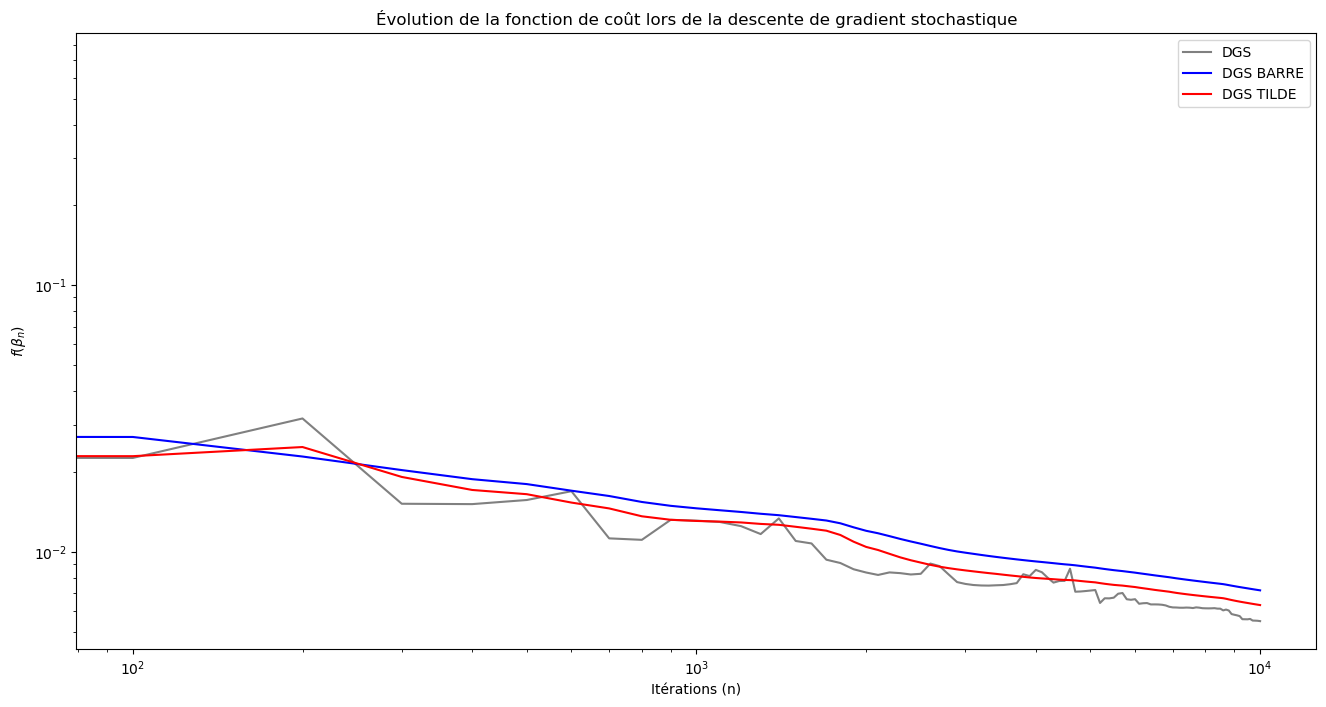

In [46]:
### CE CODE PREND DU TEMPS POUR S'EXÉCUTER ###

# Nombre d'itérations de la descente
n_iter = 10000

# Pas de la descente
def gamma(n):
    alpha = 0.4
    gamma = 1e-2
    return gamma / (n/N)**alpha

# Initialisation
beta_dgs = np.zeros((d, n_iter+1))
beta_bar = np.zeros((d, n_iter+1))
beta_tld = np.zeros((d, n_iter+1))
K = np.random.choice(N, size=n_iter)

for n in range(n_iter):
    # Calcul du gradient
    grad = p((1 - 2*y[K[n]]) * x[K[n],:].dot(beta_dgs[:,n])) * (1 - 2*y[K[n]]) * x[K[n],:]
    # Mise à jour de la descente de gradient stochastique et des moyennes
    beta_dgs[:,n+1] = beta_dgs[:,n] - gamma(n+1) * grad
    beta_bar[:,n+1] = beta_bar[:,n] + (beta_dgs[:,n+1] - beta_bar[:,n]) / (n + 1)
    beta_tld[:,n+1] = beta_tld[:,n] + 2.0 * (beta_dgs[:,n+1] - beta_tld[:,n]) / (n + 2)

# Calcul des valeurs de f toutes les n_step itérations
n_step = 100
grille = (np.arange(n_iter+1) % n_step == 0)
f_dgs = f(x, y, beta_dgs[:,grille])
f_bar = f(x, y, beta_bar[:,grille])
f_tld = f(x, y, beta_tld[:,grille])

# Affichage
plt.figure(figsize=(16.0, 8.0))
plt.xscale('log')
plt.yscale('log')
plt.plot(np.arange(n_iter+1)[grille], f_dgs, color='grey', label='DGS')
plt.plot(np.arange(n_iter+1)[grille], f_bar, color='blue', label='DGS BARRE')
plt.plot(np.arange(n_iter+1)[grille], f_tld, color='red', label='DGS TILDE')
_ = plt.legend()

# Amélioration : affichage légende
plt.title("Évolution de la fonction de coût lors de la descente de gradient stochastique")
plt.xlabel("Itérations (n)")
plt.ylabel(r"$f(\beta_n)$")
plt.show()

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.6.</strong> 


### Rappel des définitions
La mise à jour de la DGS est
$$
\beta_{DGS}^{(n+1)} = \beta_{DGS}^{(n)} - \gamma_{n+1}\, p\!\left( (1 - 2 y_{K_n})\, x_{K_n}'\, \beta_{DGS}^{(n)} \right) (1 - 2 y_{K_n})\, x_{K_n},
$$
avec
$$
\gamma_n = \frac{\gamma}{(n/N)^{\alpha}} = \gamma \left(\frac{N}{n}\right)^{\alpha}, \qquad \alpha \in [0,1],\ \gamma>0.
$$

---

### Impact des paramètres avec cette normalisation

- **Cas $\alpha = 0$ (pas constant) :**
  $$
  \gamma_n = \gamma.
  $$ 
  Le pas est similaire à chaque itération. Avec un $\gamma$ raisonnablement petit, on observe une **décroissance régulière** de la fonction de coût, car on continue d’avancer de manière soutenue à chaque pas. 

- **Cas $0 < \alpha \leq 1$ (pas décroissant) :**
  $$
  \gamma_n = \gamma \left(\frac{N}{n}\right)^{\alpha}.
  $$
  Le pas est **grand au début** (proportionnel à $N^\alpha$) puis **décroît**.  
  - Si $\alpha$ est **petit** (ex. $0.3$–$0.5$): le pas décroît lentement; bonne progression initiale, mais la variance met plus de temps à s’atténuer.  
  - Si $\alpha$ est **proche de 1**: $\gamma_n \approx \gamma\, N / n$. Les **premiers pas peuvent être très grands** (risque d’overshoot si $\gamma$ n’est pas assez petit), puis la descente **se calme** et peut **stagner** si $\gamma$ est trop petit relativement à l’échelle des gradients.


Pour obtenir une bonne convergence, on choisit :
- Un **$\gamma$ modéré** (ici $1e-2$) par rapport à $N$ (ici $N=1000$) pour permettre de grands pas au début sans divergence.
- Un **$\alpha$ de l'ordre de $0.4$** pour un bon compromis entre vitesse initiale et décroissance du pas.


---

### Comparaison avec le gradient déterministe et coût en évaluations du gradient

- **Gradient déterministe** par itération:
  $$
  \nabla f(\beta) = \frac{1}{N} \sum_{k=1}^N \nabla F_k(\beta)
  $$
  nécessite **$N$ évaluations** du gradient par itération.

- **DGS** par itération:
  $$
  \nabla F_{K_n}(\beta)
  $$
  nécessite **1 seule évaluation** du gradient par itération.

- **Conséquence**
  - La DGS demande **plus d’itérations** pour une précision comparable, mais **chaque itération est beaucoup moins coûteuse**.
  - Avec les moyennes BARRE et TIDLE, on peut attenuer les oscillations inhérentes à la DGS.



</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.7.</strong> Exécuter le code suivant pour mesurer de la qualité du prédicteur obtenu sur les données de test. Commenter les résultats et comparer avec ceux de la <a href="#qii5" style="color:white">question II.5</a>.</p>

In [11]:
# Descente de gradient stochastique
beta = beta_dgs[:,-1]

mal_classe = np.abs(y_test - p(x_test.dot(beta))) > 0.5
print('Taux d\'erreur pour la descente de gradient stochastique : {:.2%} [ {} image(s) mal classées ]'.format(mal_classe.mean(), mal_classe.sum()))

pred = p(x_test.dot(beta))
pred0 = pred[y_test == 0]
pred1 = pred[y_test == 1]
confusion = np.array([
    [(pred0 < 0.5).mean(), (pred0 >= 0.5).mean()],
    [(pred1 < 0.5).mean(), (pred1 >= 0.5).mean()]
])
print('Matrice de confusion pour la descente de gradient stochastique :\n{}\n'.format(confusion))

# Moyenne beta_bar
beta = beta_bar[:,-1]

mal_classe = np.abs(y_test - p(x_test.dot(beta))) > 0.5
print('Taux d\'erreur pour la moyenne beta_bar : {:.2%} [ {} image(s) mal classées ]'.format(mal_classe.mean(), mal_classe.sum()))

pred = p(x_test.dot(beta))
pred0 = pred[y_test == 0]
pred1 = pred[y_test == 1]
confusion = np.array([
    [(pred0 < 0.5).mean(), (pred0 >= 0.5).mean()],
    [(pred1 < 0.5).mean(), (pred1 >= 0.5).mean()]
])
print('Matrice de confusion pour la moyenne beta_bar :\n{}\n'.format(confusion))

# Moyenne beta_tld
beta = beta_tld[:,-1]

mal_classe = np.abs(y_test - p(x_test.dot(beta))) > 0.5
print('Taux d\'erreur pour la moyenne beta_tld : {:.2%} [ {} image(s) mal classées ]'.format(mal_classe.mean(), mal_classe.sum()))

pred = p(x_test.dot(beta))
pred0 = pred[y_test == 0]
pred1 = pred[y_test == 1]
confusion = np.array([
    [(pred0 < 0.5).mean(), (pred0 >= 0.5).mean()],
    [(pred1 < 0.5).mean(), (pred1 >= 0.5).mean()]
])
print('Matrice de confusion pour la moyenne beta_tld :\n{}'.format(confusion))

Taux d'erreur pour la descente de gradient stochastique : 0.33% [ 7 image(s) mal classées ]
Matrice de confusion pour la descente de gradient stochastique :
[[0.99489796 0.00510204]
 [0.00176211 0.99823789]]

Taux d'erreur pour la moyenne beta_bar : 0.33% [ 7 image(s) mal classées ]
Matrice de confusion pour la moyenne beta_bar :
[[0.99489796 0.00510204]
 [0.00176211 0.99823789]]

Taux d'erreur pour la moyenne beta_tld : 0.33% [ 7 image(s) mal classées ]
Matrice de confusion pour la moyenne beta_tld :
[[0.99489796 0.00510204]
 [0.00176211 0.99823789]]


<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.7.</strong> 

On obtient de nouveau de très bons résultats avec la DGS, avec seulement 7 erreurs sur 2115 images de test.
Ces performances sont légèrement inférieures à celles de la descente de gradient déterministe (3 erreurs). Cependant, compte tenu du coût réduit par itération de la DGS, cela reste un excellent compromis entre efficacité et précision.

Par ailleurs, on observe que les résultats avec les moyennes BARRE et TIDLE sont identiques à ceux de la DGS brute dans ce cas, indiquant que la variance résiduelle n'affecte pas significativement la performance du modèle sur ce jeu de données.


</div>

<h2>Descente de gradient stochastique moyen (DGSM)</h2>

Lorsque l'espace mémoire disponible le permet, il est possible d'accélérer la descente de gradient stochastique en conservant les valeurs du gradient calculées précédemment. Cette méthode est appelée la **descente de gradient stochastique moyen** et se calcule comme la descente de gradient stochastique à la différence que le gradient est replacé par la moyenne des gradients obervés lors des itérations précédentes. Des résultats théoriques sur la vitesse de convergence de cet algorithme ont été obtenus en 2016 par Mark Schmidt, Nicolas Le Roux et Francis Bach dans l'article [Minimizing Finite Sums with the Stochastic Average Gradient](https://arxiv.org/pdf/1309.2388.pdf). En particier, les auteurs de ce travail montrent que la descente de gradient stochastique moyen atteint une vitesse de convergence de l'ordre de $1/n$ là où la descente de gradient stochastique et les moyennes de Polyak-Ruppert ne convergent qu'à une vitesse de l'ordre de $1/\sqrt{n}$.

En considérant un état initial $\beta_{DGSM}^{(0)} \in \mathbb{R}^d$ et une suite $(K_n)_{n \in \mathbb{N}}$ de variables indépendantes de loi uniforme sur $\{1, \dots, N\}$, nous définissons la suite $(\beta_{DGSM}^{(n)})_{n \in \mathbb{N}}$ par récurrence,

\begin{equation*}
\forall n \in \mathbb{N},\ \beta_{DGSM}^{(n+1)} = \beta_{DGSM}^{(n)} - \frac{\gamma}{N} \sum_{k=1}^N G^{(n)}_k
\end{equation*}

où le pas $\gamma > 0$ est constant et les gradients sont stockés dans la suite $(G^{(n)})_{n \in \mathbb{N}}$ donnée par $G^{(0)} = 0$ et

\begin{equation*}
\forall n \in \mathbb{N},\ \forall k \in \{1, \dots, N\},\ G^{(n+1)}_k = \begin{cases}
\nabla F_{K_n}(\beta_{DGSM}^{(n)}) & \text{si}\ k = K_n,\\
G^{(n)}_k & \text{sinon}.
\end{cases}
\end{equation*}

Pour assurer de bonnes propriétés de convergence, le pas constant $\gamma$ doit être calibré de la même manière que dans le cas de la descente de gradient déterministe de façon à être inférieur à l'inverse de la norme de Lipschitz de la fonction à minimiser.

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.8.</strong> Montrer que

\begin{equation*}
\forall n \in \mathbb{N},\ \sum_{k=1}^N G^{(n+1)}_k = \sum_{k=1}^N G^{(n)}_k + \left( \nabla F_{K_n}(\beta_{DGSM}^{(n)}) - G^{(n)}_{K_n} \right).
\end{equation*}
Quel avantage présente cette identité du point de vue algorithmique?</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.8.</strong>

Par définition, pour tout n et tout k,
$$
G^{(n+1)}_k =
\begin{cases}
\nabla F_{K_n}(\beta_{DGSM}^{(n)}) & \text{si } k = K_n,\\[4pt]
G^{(n)}_k & \text{sinon}.
\end{cases}
$$
En sommant sur k de 1 à N :
$$
\sum_{k=1}^N G^{(n+1)}_k
= \sum_{k \neq K_n} G^{(n)}_k + \nabla F_{K_n}(\beta_{DGSM}^{(n)})
= \sum_{k=1}^N G^{(n)}_k - G^{(n)}_{K_n} + \nabla F_{K_n}(\beta_{DGSM}^{(n)}).
$$
Ainsi,
$$
\sum_{k=1}^N G^{(n+1)}_k
= \sum_{k=1}^N G^{(n)}_k + \Big( \nabla F_{K_n}(\beta_{DGSM}^{(n)}) - G^{(n)}_{K_n} \Big).
$$


Cette identité permet une **mise à jour incrémentale** de la somme des gradients mémorisés :
- On évite de **re-sommer N termes** à chaque itération.
- On met à jour la somme courante en à partir d’un seul gradient nouveau.
- La mise à jour de $\beta_{DGSM}^{(n)}$ via la moyenne $\frac{1}{N}\sum_k G^{(n)}_k$ devient **très efficace** (une addition et une soustraction).

</div>



<p class="bg-primary" style="padding:1em"><strong>QUESTION II.9.</strong> Exécuter le code suivant pour simuler une trajectoire de la descente de gradient stochastique moyen. Expliquer la forme de la décroissance de $f$ le long de la trajectoire de la descente du gradient stochastique moyen. Comparer la vitesse de convergence observée sur le graphique à l'échelle logarithmique avec celle obtenue dans le cadre de la descente de gradient stochastique.</p>

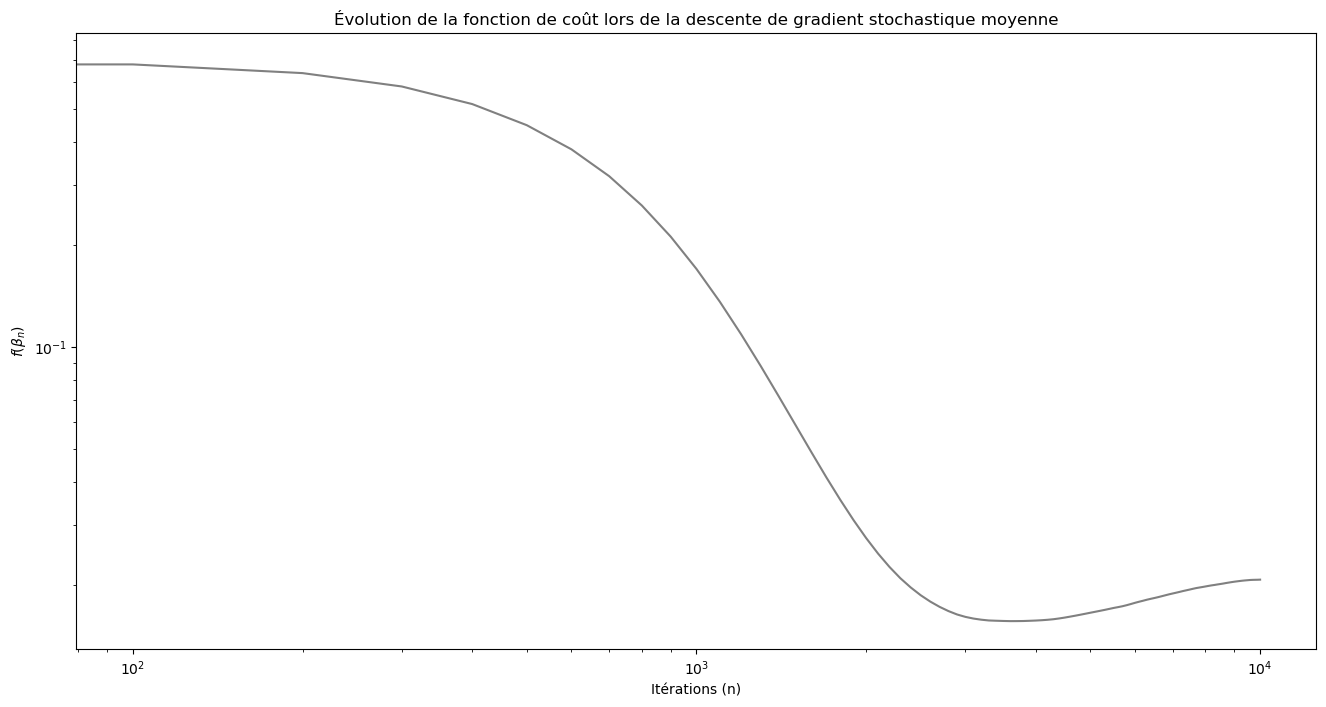

In [54]:
### CE CODE PREND DU TEMPS POUR S'EXÉCUTER ###

# Nombre d'itérations de la descente
n_iter = 10000

# Pas de la descente
gamma = 1e-2

# Initialisation
beta_dgsm = np.zeros((d, n_iter+1))
G = np.zeros((N, d))
G_somme = np.zeros(d)
K = np.random.choice(N, size=n_iter)

for n in range(n_iter):
    # Calcul du gradient
    grad = p((1 - 2*y[K[n]]) * x[K[n],:].dot(beta_dgsm[:,n])) * (1 - 2*y[K[n]]) * x[K[n],:]
    G_somme = G_somme + grad - G[K[n],:]
    G[K[n],:] = grad
    # Mise à jour de la descente de gradient stochastique moyen
    beta_dgsm[:,n+1] = beta_dgsm[:,n] - gamma * G_somme / N

# Calcul des valeurs de f toutes les n_step itérations
n_step = 100
grille = (np.arange(n_iter+1) % n_step == 0)
f_dgsm = f(x, y, beta_dgsm[:,grille])

# Affichage
plt.figure(figsize=(16.0, 8.0))
plt.xscale('log')
plt.yscale('log')
_ = plt.plot(np.arange(n_iter+1)[grille], f_dgsm, color='grey')

# Amélioration : affichage légende
plt.title("Évolution de la fonction de coût lors de la descente de gradient stochastique moyenne")
plt.xlabel("Itérations (n)")
plt.ylabel(r"$f(\beta_n)$")
plt.show()

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.9.</strong> 

On observe une **décroissance lente**, suivie d’une **chute rapide**, puis une **remontée** de la fonction de coût.

On a : 
$$
\beta_{DGSM}^{(n+1)} = \beta_{DGSM}^{(n)} - \frac{\gamma}{N} \sum_{k=1}^N G^{(n)}_k,
$$

Ainsi :

- **Décroissance lente**  
  Au début, $G^{(0)}=0$ et la somme $G_{\text{somme}}=\sum_k G^{(n)}_k$ est peu informative. Les mises à jour sont donc modestes → décroissance lente.

- **Chute rapide de la fonction de coût**  
  Une fois la mémoire des gradients suffisamment alimentée, la moyenne $\frac{1}{N}\sum_k G^{(n)}_k$ **approxime le gradient complet** : $\sum _{k=1}^NG_k^{(n)}\approx \sum _{k=1}^N\nabla F_k(\beta ^{(n)})$
  . La fonction de coût chute fortement et la trajectoire se rapproche d’une DG déterministe.

- **Remontée de la fonction de coût**  
  La DGSM utilise des gradients mémorisés qui ne sont pas tous évalués au point courant. La somme peut donc sur‑estimer le vrai gradient, et entraîner une **remontée** de la fonction de coût si le pas $\gamma$ est trop grand.


On observe effectivement une **vitesse de convergence plus rapide que la DGS classique**.




</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.10.</strong> Exécuter le code suivant pour mesurer de la qualité du prédicteur obtenu sur les données de test. Commenter les résultats et comparer avec ceux des questions précédentes.</p>

In [13]:
beta = beta_dgsm[:,-1]

mal_classe = np.abs(y_test - p(x_test.dot(beta))) > 0.5
print('Taux d\'erreur pour la descente de gradient stochastique moyen : {:.2%} [ {} image(s) mal classées ]'.format(mal_classe.mean(), mal_classe.sum()))


pred = p(x_test.dot(beta))
pred0 = pred[y_test == 0]
pred1 = pred[y_test == 1]
confusion = np.array([
    [(pred0 < 0.5).mean(), (pred0 >= 0.5).mean()],
    [(pred1 < 0.5).mean(), (pred1 >= 0.5).mean()]
])
print('Matrice de confusion pour la descente de gradient stochastique moyen :\n{}\n'.format(confusion))

Taux d'erreur pour la descente de gradient stochastique moyen : 0.09% [ 2 image(s) mal classées ]
Matrice de confusion pour la descente de gradient stochastique moyen :
[[0.99795918 0.00204082]
 [0.         1.        ]]



<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.10.</strong> 

Les performances du modèle obtenu avec la DGSM sont excellentes, avec seulement 2 erreurs sur 2115 images de test.
Ces résultats sont légèrement meilleurs que ceux obtenus avec la descente de gradient déterministe (3 erreurs) et la DGS (7 erreurs).  
Cela illustre le fait que la DGSM combine l'efficacité de la DGS avec une meilleure approximation du gradient complet.

</div>

<h2>Problème complet</h2>

Nous proposons maintenant de considérer le problème de la classification des $0$ et des $1$ en ne limitant plus le nombre d'images utilisées pour l'entraînement de la régression logistique. Il n'est dorénavant plus raisonnable de calculer et d'afficher les valeurs prises par la fonction $f$ à minimiser et nous ne conservons plus les différentes valeurs obtenues des itérations de nos algorithmes.

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.11.</strong> Exécuter le code suivant pour extraire et mettre en forme l'ensemble des données MNIST représentant des $0$ et des $1$. Est-il envisageable de calculer une descente de gradient déterministe à partir de ces données?</p>

In [14]:
# Nombre d'images de 0 et de 1 dans les données d'entraînement
N = filtre_0_1.sum()

# Extraction des données d'entraînement
x = np.zeros((N, d))
for i in range(N):
    x[i,0] = 1.0
    x[i,1:] = images[filtre_0_1][i].reshape(image_taille) / 255
y = labels[filtre_0_1].astype(np.int8)

print('Dimension des données d\'entraînement : {}.'.format(x.shape))

Dimension des données d'entraînement : (12665, 785).


<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.11.</strong> 

Il n'est pas envisageable de calculer une descente de gradient déterministe avec l'ensemble complet des données MNIST.

Chacune des 12665 itérations de la descente de gradient nécessiterait le calcul du gradient complet, impliquant une somme sur 12665 termes.

Il y aurait donc un total de $12665 \times 12665 = 160,432,225$ évaluations de la fonction $p$.

Le temps de calcul serait prohibitif et l'espace mémoire requis pour stocker les gradients intermédiaires serait également très élevé.


</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.12.</strong> Compléter les dernières lignes et exécuter le code suivant pour calculer la descente de gradient stochastique et les moyennes de Polyak-Ruppert. Commenter le temps d'exécution pour différentes valeurs de <b>n_iter</b>.</p>

In [98]:
def DGS(n_iter):
    # Pas de la descente
    def gamma(n):
        alpha = 1.0
        gamma = 1e-2
        return gamma / (n/N)**alpha

    # Initialisation
    beta_dgs = np.zeros(d)
    beta_bar = np.zeros(d)
    beta_tld = np.zeros(d)
    K = np.random.choice(N, size=n_iter)

    for n in range(n_iter):
        # Calcul du gradient
        grad = p((1 - 2*y[K[n]]) * x[K[n],:].dot(beta_dgs)) * (1 - 2*y[K[n]]) * x[K[n],:]
        # Mise à jour de la descente de gradient stochastique et des moyennes
        beta_dgs = beta_dgs - gamma(n+1) * grad
        beta_bar = beta_bar + (beta_dgs - beta_bar) / (n + 1)
        beta_tld = beta_tld + 2.0 * (beta_dgs - beta_tld) / (n + 2)
    return beta_dgs, beta_bar, beta_tld

# Nombre d'itérations de la descente
n_iter = 10000
beta_dgs, beta_bar, beta_tld = DGS(n_iter)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.12.</strong> 

Le temps d'exécution de la descente de gradient stochastique (DGS) et des moyennes de Polyak-Ruppert dépend linéairement du nombre d'itérations `n_iter`.

On observe que le temps d'exécution est bien plus faible que le temps nécessaire lorsque l'on stockait les valeurs intermédiaires de la fonction de coût, car on évite les calculs redondants et le stockage de grandes quantités de données.

</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.13.</strong> Écrire une portion de code pour calculer le taux d'erreur des prédicteurs obtenus à la question précédente pour la classification des données de test. À partir de combien d'itérations ces résultats commencent à être de &laquo; bonne &raquo; qualité? Afficher quelques exemples de données mal classées.</p>

Taux d'erreur DGS (n_iter = 10000) : 0.33% || 7 images mal classées
Taux d'erreur Moyenne simple (n_iter = 10000) : 0.24% || 5 images mal classées
Taux d'erreur Moyenne pondérée (n_iter = 10000) : 0.33% || 7 images mal classées


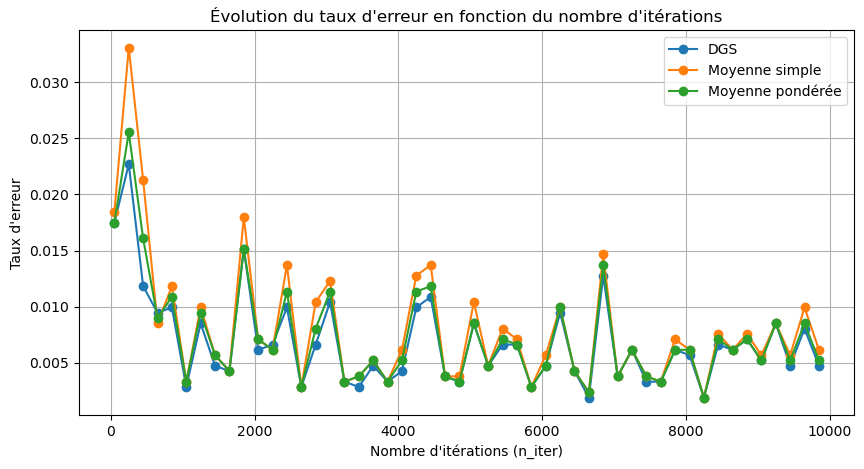

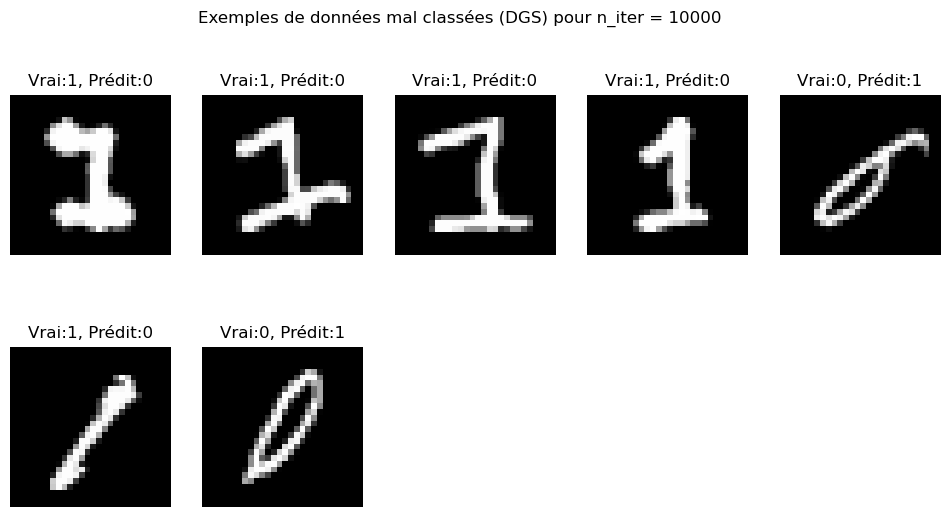

In [127]:
# Fonction de calcul de l'erreur

def predict(beta, x):
    proba = p(x.dot(beta))
    return (proba >= 0.5).astype(int)

def compute_error(beta, x, y_test):
    y_pred = predict(beta, x)
    return np.mean(y_pred != y_test)

print(f"Taux d'erreur DGS (n_iter = {n_iter}) : {compute_error(beta_dgs, x_test, y_test):.2%} || {np.sum(predict(beta_dgs, x_test) != y_test)} images mal classées")
print(f"Taux d'erreur Moyenne simple (n_iter = {n_iter}) : {compute_error(beta_bar, x_test, y_test):.2%} || {np.sum(predict(beta_bar, x_test) != y_test)} images mal classées")
print(f"Taux d'erreur Moyenne pondérée (n_iter = {n_iter}) : {compute_error(beta_tld, x_test, y_test):.2%} || {np.sum(predict(beta_tld, x_test) != y_test)} images mal classées")

# On peut tracer l'évolution du taux d'erreur en fonction de n_iter
n_iter_values = np.arange(50, 10000, 200)
beta_dgs_list = []
beta_bar_list = []
beta_tld_list = []
err_dgs_list = []
err_bar_list = []
err_tld_list = []

for n_iter_val in n_iter_values:
    beta_dgs_val, beta_bar_val, beta_tld_val = DGS(n_iter_val)
    beta_dgs_list.append(beta_dgs_val)
    beta_bar_list.append(beta_bar_val)
    beta_tld_list.append(beta_tld_val)

    err_dgs_list.append(compute_error(beta_dgs_val, x_test, y_test))
    err_bar_list.append(compute_error(beta_bar_val, x_test, y_test))
    err_tld_list.append(compute_error(beta_tld_val, x_test, y_test))

# Tracer l'évolution du taux d'erreur
plt.figure(figsize=(10,5))
plt.plot(n_iter_values, err_dgs_list, marker='o', label='DGS')
plt.plot(n_iter_values, err_bar_list, marker='o', label='Moyenne simple')
plt.plot(n_iter_values, err_tld_list, marker='o', label='Moyenne pondérée')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Nombre d\'itérations (n_iter)')
plt.ylabel('Taux d\'erreur')
plt.title('Évolution du taux d\'erreur en fonction du nombre d\'itérations')
plt.legend()
plt.grid(True)
plt.show()


# Afficher les exemples mal classés
y_pred_dgs = predict(beta_dgs, x_test)
misclassified_idx = np.where(y_pred_dgs != y_test)[0]
plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx][1:].reshape(28,28), cmap="gray")
    plt.title(f"Vrai:{y_test[idx]}, Prédit:{y_pred_dgs[idx]}")
    plt.axis("off")
plt.suptitle("Exemples de données mal classées (DGS) pour n_iter = {}".format(n_iter))
plt.show()

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.13.</strong> 

On observe que les résultats commencent à être de bonne qualité après environ 500 itérations.

Le taux d'erreur diminue significativement à partir de ce point, atteignant un niveau stable avec peu d'erreurs supplémentaires au-delà de 1000 itérations.


</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.14.</strong> Implanter l'algorithme de la descente de gradient stochastique moyen et afficher les résultats obtenus sur les données de test. À partir de combien d'itérations ces résultats commencent à être de &laquo; bonne &raquo; qualité? Comparer avec les résultats de la question précédente.</p>

In [128]:
# PLACEZ VOTRE CODE ICI
# descente de gradient stochastique moyen
def DGS_moyen(n_iter):
    # Pas de la descente
    gamma = 1e-2

    # Initialisation
    beta_dgsm = np.zeros(d)
    G = np.zeros((N, d))
    G_somme = np.zeros(d)
    K = np.random.choice(N, size=n_iter)

    for n in range(n_iter):
        # Calcul du gradient
        grad = p((1 - 2*y[K[n]]) * x[K[n],:].dot(beta_dgsm)) * (1 - 2*y[K[n]]) * x[K[n],:]
        G_somme = G_somme + grad - G[K[n],:]
        G[K[n],:] = grad
        # Mise à jour de la descente de gradient stochastique moyen
        beta_dgsm = beta_dgsm - gamma * G_somme / N
    return beta_dgsm

n_iter = 10000
beta_dgsm = DGS_moyen(n_iter)

Taux d'erreur DGS moyen (n_iter = 10000) : 0.14% || 3 images mal classées


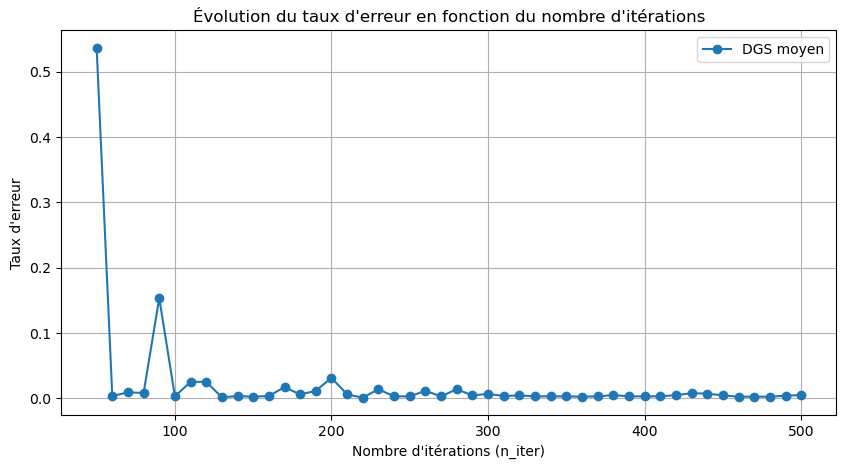

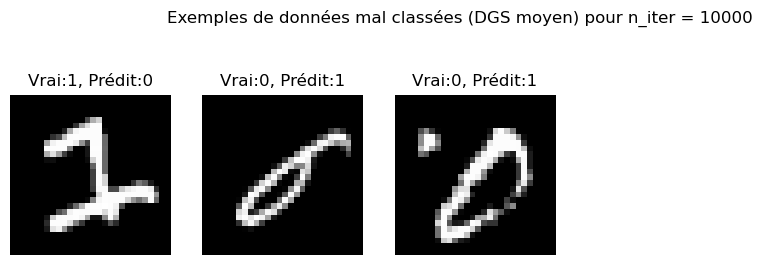

In [137]:
print(f"Taux d'erreur DGS moyen (n_iter = {n_iter}) : {compute_error(beta_dgsm, x_test, y_test):.2%} || {np.sum(predict(beta_dgsm, x_test) != y_test)} images mal classées")

# On peut tracer l'évolution du taux d'erreur en fonction de n_iter
n_iter_values = np.arange(50, 501, 10)
beta_dgsm_list = []
err_dgsm_list = []

for n_iter_val in n_iter_values:
    beta_dgsm_val= DGS_moyen(n_iter_val)
    beta_dgsm_list.append(beta_dgsm_val)
    err_dgsm_list.append(compute_error(beta_dgsm_val, x_test, y_test))

# Tracer l'évolution du taux d'erreur
plt.figure(figsize=(10,5))
plt.plot(n_iter_values, err_dgsm_list, marker='o', label='DGS moyen')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Nombre d\'itérations (n_iter)')
plt.ylabel('Taux d\'erreur')
plt.title('Évolution du taux d\'erreur en fonction du nombre d\'itérations')
plt.legend()
plt.grid(True)
plt.show()


# Afficher les exemples mal classés
y_pred_dgsm = predict(beta_dgsm, x_test)
misclassified_idx = np.where(y_pred_dgsm != y_test)[0]
plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx][1:].reshape(28,28), cmap="gray")
    plt.title(f"Vrai:{y_test[idx]}, Prédit:{y_pred_dgsm[idx]}")
    plt.axis("off")
plt.suptitle("Exemples de données mal classées (DGS moyen) pour n_iter = {}".format(n_iter))
plt.show()

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.14.</strong> 

Les résultats commencent à être de bonne qualité après environ 50 itérations avec la descente de gradient stochastique moyen (DGSM).

Comparé à la DGS, la DGSM atteint une performance similaire en beaucoup moins d'itérations, grâce à l'utilisation des gradients mémorisés qui améliorent l'estimation du gradient complet.

On observe également un taux d'erreur légèrement inférieur : 3 erreurs (DGSM) vs 7 erreurs (DGS) pour un nombre d'itérations équivalent, confirmant son efficacité accrue par rapport à la DGS classique.

</div>

<h1>III. Pour aller plus loin : régression logistique multinomiale</h1>

Dans cette dernière partie, nous reprenons le problème général posé initialement de la classification des données MNIST dans leur ensemble. L'objectif est donc de construire une méthode de prédiction du label d'une image de chiffre manuscrit. De la même façon que dans la partie précédente, une image se manipule comme un vecteur de $\mathbb{R}^d$ avec $d=785$ qui contient les pixels normalisés dans $[0,1]$ et une composante constante pour l'ordonnée à l'origine. Par contre, le label d'une image est maintenant un entier quelconque dans l'ensemble $\{0, \dots, 9\}$.

La régression logistique est limitée à la prédiction d'une variable binaire $Y \in \{0,1\}$ à partir d'un vecteur $X \in \mathbb{R}^d$. Pour étendre le principe à un nombre de labels plus grand que $2$, il convient de remarquer que la loi de $Y$ conditionnellement à $X$ vérifie

\begin{equation*}
\forall x \in \mathbb{R}^d,\ \mathbb{P}\left( Y = 1 \mid X = x \right) = \mathbb{P}\left( Y = 0 \mid X = x \right) e^{x'\beta}
\end{equation*}
où $\beta \in \mathbb{R}^d$ est le vecteur des coefficients de la régression logistique dont l'estimation a occupé toute la partie précédente. Si $Y$ peut prendre plus que deux valeurs, cette relation où la probabilité du label $1$ s'exprime par rapport à celle du label $0$ peut être généralisée en utilisant à chaque fois le même label comme référence. Considérons le label $0$ comme la référence pour nos labels à valeurs dans $\{0, \dots, 9\}$, nous pouvons modéliser la loi de $Y$ conditionnellement à $X$ avec les relations

\begin{equation*}
\forall x \in \mathbb{R}^d,\ \forall \ell \in \{1, \dots, 9\},\ \mathbb{P}\left( Y = \ell \mid X = x \right) = \mathbb{P}\left( Y = 0 \mid X = x \right) e^{x'\beta_{\ell}}
\end{equation*}

où $\beta_1, \dots, \beta_9 \in \mathbb{R}^d$ sont des vecteurs des coefficients à estimer. Par définition, la probabilité du label $0$ de référence est donnée par

\begin{equation*}
\forall x \in \mathbb{R}^d,\ \mathbb{P}\left( Y = 0 \mid X = x \right) = 1 - \sum_{\ell'=1}^9 \mathbb{P}\left( Y = \ell' \mid X = x \right) = 1 - \mathbb{P}\left( Y = 0 \mid X = x \right) \sum_{\ell'=1}^9 e^{x'\beta_{\ell'}}
\end{equation*}

et satisfait donc

\begin{equation*}
\forall x \in \mathbb{R}^d,\ \mathbb{P}\left( Y = 0 \mid X = x \right) = \dfrac{1}{\displaystyle{1 + \sum_{\ell'=1}^9 \exp\left( x'\beta_{\ell'} \right)}}.
\end{equation*}

Ainsi, avec cette identité, nous pouvons déduire le modèle de la **régression logistique multinomiale** qui généralise celui de la régression logistique et qui prend la forme suivante dans notre cas d'un label à valeurs dans $\{0, \dots, 9\}$,

\begin{equation*}
\forall x \in \mathbb{R}^d,\ \forall \ell \in \{1, \dots 9\},\ \mathbb{P}\left( Y = \ell \mid X = x \right) = \dfrac{\exp\left( x'\beta_{\ell} \right)}{\displaystyle{1 + \sum_{\ell'=1}^9 \exp\left( x'\beta_{\ell'} \right)}}.
\end{equation*}

Un point de vue alternatif que nous ne développerons pas dans la suite pour comprendre ce modèle est de considérer la régression logistique multinomiale comme un test multiple de l'hypothèse nulle &laquo; Le label est $0$ &raquo; contre les hypothèses alternatives &laquo; Le label est $\ell$ &raquo; pour $\ell$ allant de $1$ à $9$ et où le niveau est réparti à l'aide des quantités $e^{x'\beta_{\ell}}$.

Comme précédemment, nous utilisons de vraisemblance pour estimer les vecteurs $\beta_1, \dots, \beta_9 \in \mathbb{R}^d$ à partir d'observations $(x_1,y_1), \dots, (x_N,y_N)$ à valeurs dans $\mathbb{R}^d \times \{0, \dots, 9\}$,

\begin{equation*}
L_N(\beta_1, \dots, \beta_9) = \prod_{k=1}^N \mathbb{P}(Y = y_k \mid X = x_k) = \prod_{\ell=1}^9 \prod_{k \in I_{\ell}} \exp\left( x_k'\beta_{\ell} \right) \times \prod_{k=1}^N \left( 1 + \sum_{\ell=1}^9 \exp\left( x_k'\beta_{\ell} \right) \right)^{-1}
\end{equation*}

où $I_0, \dots, I_9$ est la partition de $\{1, \dots, N\}$ induite par les labels,

\begin{equation*}
\forall \ell \in \{0, \dots, 9\},\ I_{\ell} = \left\{ k \in \{1, \dots, N\}\ \text{tels que}\ y_k = \ell \right\}.
\end{equation*}

Pour maximiser la vraisemblance, il est équivalent de minimiser la fonction $f$ donnée par

\begin{equation*}
\forall \beta_1, \dots, \beta_9 \in \mathbb{R}^d,\ f(\beta_1, \dots, \beta_9) = -\frac{1}{N} \ln\left( L_N(\beta_1, \dots, \beta_9) \right).
\end{equation*}

<p id="qiii1" class="bg-primary" style="padding:1em"><strong>QUESTION III.1.</strong> Montrer que, pour tout $\beta_1, \dots, \beta_9 \in \mathbb{R}^d$,
\begin{equation*}
f(\beta_1, \dots, \beta_9) = \frac{1}{N} \sum_{k=1}^N \ln\left( 1 + \sum_{\ell=1}^9 \exp\left( x_k'\beta_{\ell} \right) \right) - x_k'\beta_{y_k}
\end{equation*}
où nous avons posé $\beta_0 = 0$. Soit $\ell \in \{1, \dots, 9\}$, en déduire que le gradient $\nabla_{\ell} f$ par rapport à $\beta_{\ell}$ s'écrit
\begin{equation*}
\nabla_{\ell} f(\beta_1, \dots, \beta_9) = \frac{1}{N} \sum_{k=1}^N \left\{ \exp\left( x_k'\beta_{\ell} \right) \left( 1 + \sum_{\ell'=1}^9 \exp\left( x_k'\beta_{\ell'} \right) \right)^{-1} - \mathbf{1}_{\ell}(y_k) \right\} \times x_k
\end{equation*}
où l'indicatrice $\mathbf{1}_{\ell}(y)$ vaut $1$ si $y = \ell$ et $0$ sinon.</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION III.1.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION III.2.</strong> Exécuter le code suivant pour mettre en forme les données MNIST. Est-il envisageable d'utiliser une descente de gradient déterministe pour entraîner la régression logistique multinomiale sur le jeu d'entraînement?</p>

In [ ]:
# Mise en forme des données d'entraînement
N = images.shape[0]
x = np.zeros((N, d))
for i in range(N):
    x[i,0] = 1.0
    x[i,1:] = images[i].reshape(image_taille) / 255
y = labels.astype(np.int8)

# Mise en forme des données de test
N_test = images_test.shape[0]
x_test = np.zeros((N_test, d))
for i in range(N_test):
    x_test[i,0] = 1.0
    x_test[i,1:] = images_test[i].reshape(image_taille) / 255
y_test = labels_test.astype(np.int8)

print('Dimension des données d\'entraînement : {}.'.format(x.shape))
print('Dimension des données de test : {}.'.format(x_test.shape))

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION III.2.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<h2>Descente de gradient stochastique et moyennes de Polyak-Ruppert</h2>

L'écriture de la fonction $f$ à minimiser comme une moyenne que nous avons obtenue à la [question III.1](#qiii1) conduit à considérer les fonction $F_1, \dots, F_N$ définies pour tout $\beta_1, \dots, \beta_9 \in \mathbb{R}^d$ par

\begin{equation*}
\forall k \in \{1, \dots, N\},\ F_k(\beta_1, \dots, \beta_9) = \ln\left( 1 + \sum_{\ell=1}^9 \exp\left( x_k'\beta_{\ell} \right) \right) - x_k'\beta_{y_k}
\end{equation*}

et les gradients associés

\begin{equation*}
\forall \ell \in \{1, \dots, 9\},\ \forall k \in \{1, \dots, N\},\ \nabla_{\ell} F_k(\beta_1, \dots, \beta_9) = \left\{ \exp\left( x_k'\beta_{\ell} \right) \left( 1 + \sum_{\ell'=1}^9 \exp\left( x_k'\beta_{\ell'} \right) \right)^{-1} - \mathbf{1}_{\ell}(y_k) \right\} \times x_k.
\end{equation*}

Ainsi, en considérant une variable aléatoire $K$ uniforme sur $\{1, \dots, N\}$, nous avons

\begin{equation*}
\forall \beta_1, \dots, \beta_9 \in \mathbb{R}^d,\ f(\beta_1, \dots, \beta_9) = \mathbb{E}\left[ F_K(\beta_1, \dots, \beta_9) \right]
\end{equation*}

et nous pouvons calculer $9$ descentes de gradient stochastique $(\beta_1^{(n)})_{n \in \mathbb{N}}, \dots, (\beta_9^{(n)})_{n \in \mathbb{N}}$ simultanément. À l'aide d'une suite $(K_n)_{n \in \mathbb{N}}$ de variables aléatoires indépendantes de même loi que $K$, les mises à jour de ces descentes se font par récurrence et gradient par gradient

\begin{equation*}
\forall \ell \in \{1, \dots, 9\},\ \forall n \in \mathbb{N},\ \beta_{\ell}^{(n+1)} = \beta_{\ell}^{(n)} - \gamma_{n+1} \nabla_{\ell} F_{K_n}(\beta_1^{(n)}, \dots, \beta_9^{(n)})
\end{equation*}

où les états initiaux $\beta_1^{(0)}, \dots, \beta_9^{(0)} \in \mathbb{R}^d$ sont arbitraires et les pas $(\gamma_n)_{n \geqslant 1}$ sont donnés par

\begin{equation*}
\forall n \geqslant 1,\ \gamma_n = \frac{\gamma}{(n/N)^{\alpha}}
\end{equation*}

avec $\alpha \in [0,1]$ et $\gamma > 0$. Pour chaque descente de gradient stochastique, il est possible de calculer les moyennes de Polyak-Ruppert pour stabiliser l'estimation comme nous l'avons fait dans les parties précédentes.

<p class="bg-primary" style="padding:1em"><strong>QUESTION III.3.</strong> Compléter et exécuter le code suivant pour calculer les descentes de gradient stochastique et les moyennes de Polyak-Ruppert. Les descentes de gradient sont stockées en colonnes pour faciliter les évaluations futures et il faudra prêter une attention particulière aux calculs des exponentielles pour éviter les problèmes d'infini par débordement comme nous l'avons fait à la <a href="#qii2" style="color:white">question II.2</a>.</p>

In [ ]:
# Nombre d'itérations de la descente
n_iter = 100

# Pas de la descente
def gamma(n):
    alpha = 1.0
    gamma = 1e-2
    return gamma / (n/N)**alpha

# Initialisation
beta_dgs = np.zeros((d, 9))
beta_bar = np.zeros((d, 9))
beta_tld = np.zeros((d, 9))
K = np.random.choice(N, size=n_iter)

for n in range(n_iter):
    beta_new = np.zeros((d, 9))
    for l in range(9):
        # Calcul du gradient
        grad = # À COMPLÉTER
        # Nouvelle colonne de la descente de gradient stochastique
        beta_new[:,l] = bet_dgs[:,l] - gamma(n+1) * grad
    beta_dgs = beta_new
    # Mise à jour des moyennes de Polyak-Ruppert
    beta_bar = # À COMPLÉTER
    beta_tld = # À COMPLÉTER

Étant donnée une nouvelle image $x \in \mathbb{R}^d$, il est possible de calculer son score pour chaque label $\ell \in \{0, \dots, 9\}$ grâce aux résultats des $9$ descentes de gradient après $n \in \mathbb{N}$ itérations. En effet, le score du label $0$ de référence est donné par

\begin{equation*}
s_0(x) = \dfrac{1}{\displaystyle{1 + \sum_{\ell'=1}^9 \exp\left( x'\beta_{\ell'}^{(n)} \right)}}
\end{equation*}

et les scores des autres labels par

\begin{equation*}
\forall \ell \in \{1, \dots, 9\},\ s_{\ell}(x) = \dfrac{\exp\left( x'\beta_{\ell}^{(n)} \right)}{\displaystyle{1 + \sum_{\ell'=1}^9 \exp\left( x'\beta_{\ell'}^{(n)} \right)}}.
\end{equation*}

Pour attribuer un label $\ell_x$ à l'image $x$, une possibilité consiste à considérer le scrutin majoritaire en prenant le score maximal,

\begin{equation*}
\ell_x = \arg \max_{\ell \in \{0, \dots, 9\}} s_{\ell}(x).
\end{equation*}

<p class="bg-primary" style="padding:1em"><strong>QUESTION III.4.</strong> Implanter ce principe de prédiction et l'appliquer au jeu de données de test avec les résultats des descentes de gradient stochastique obtenus à la question précédente. Calculer le taux d'erreur et la matrice de confusion. Commenter la qualité des prédictions.</p>

In [ ]:
# PLACEZ VOTRE CODE ICI

<h2>Descente de gradient stochastique moyen</h2>

Lorsque l'espace mémoire le permet, il est encore possible d'accélérer la descente de gradient stochastique pour la régression logistique multinomiale selon le principe de la descente de gradient stochastique moyen. Pour $n \in \mathbb{N}$ et un label $\ell \in \{1, \dots, 9\}$, les gradients calculés au temps $n$ par rapport à la $\ell$-ème composante sont stockés dans des variables $G_{\ell,1}^{(n)}, \dots, G_{\ell,N}^{(n)}$. Les récurrences s'écrivent alors

\begin{equation*}
\forall \ell \in \{1, \dots, 9\},\ \forall n \in \mathbb{N},\ \beta_{DGSM, \ell}^{(n+1)} = \beta_{DGSM, \ell}^{(n)} - \frac{\gamma}{N} \sum_{k=1}^N G_{\ell,k}^{(n)}
\end{equation*}

où le pas constant $\gamma > 0$ doit être fixé selon les mêmes contraintes que précédemment.

<p class="bg-primary" style="padding:1em"><strong>QUESTION III.5.</strong> Implanter cet algorithme de descente de gradient stochastique moyen et calculer le taux d'erreur et la matrice de confusion sur les données de test. Comparer les résultats à ceux obtenus à la question précédente.</p>

In [ ]:
# PLACEZ VOTRE CODE ICI